In [12]:
import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [13]:
import os 

In [14]:
# Ensure cache directory exists
cache_dir = 'cache'
os.makedirs(cache_dir, exist_ok=True)

# Enable FastF1 cache for performance improvement
fastf1.Cache.enable_cache(cache_dir)


In [15]:
#setting dark theme for plots
plt.style.use('dark_background')
sns.set_style('darkgrid')

# Loading Race Data into cache

In [16]:
schedule = fastf1.get_event_schedule(2024)
track_names = schedule['EventName'][1:].tolist()
round_to_track = {i+1: track for i, track in enumerate(track_names)}

# Load and cache session data
cached_sessions = {}
for round_number in range(1, len(schedule)):
    session = fastf1.get_session(2024, round_number, 'R')
    session.load(telemetry=False, weather=False)
    cached_sessions[round_number] = session

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached dat

In [17]:
round_numbers = list(range(1,len(schedule)))
track_names = schedule['EventName'][1:].tolist()
round_to_track = {i+1: track for i, track in enumerate(track_names)}


# Function to fetch driver standings after each race 

In [18]:
def get_driver_standings():
    standings = []
    for round_number,session in cached_sessions.items():
        session = fastf1.get_session(2024,round_number,'R')
        session.load()
        results = session.results
        standings.append({
            'Track': round_to_track[round_number],
            'Round':round_number,
            'Driver':results['Abbreviation'].tolist(),
            'Points':results['Points'].tolist()
        })
    return pd.concat([pd.DataFrame(s) for s in standings ],ignore_index=True)
    

In [19]:
driver_standings = get_driver_standings()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
core           INFO 	Loading data for Saudi Arabian Grand Prix

# Function to Analyze Qualifying vs Race Performance 

In [20]:
def get_qualifying_vs_race():
    performance = []
    for round_number,session in cached_sessions.items():
        quali_session = fastf1.get_session(2024,round_number,'Q')
        race_session = fastf1.get_session(2024,round_number,'R')
        quali_session.load()
        race_session.load()
        quali = quali_session.results
        race = race_session.results
        for driver in quali['Abbreviation']:
            start_pos = int(quali.loc[quali['Abbreviation']==driver,'Position'])
            finish_pos = int(race.loc[race['Abbreviation']==driver,'Position'])
            performance.append({
                'Track': round_to_track[round_number],
                'Round':round_number,
                'Driver':driver,
                'Start':start_pos,
                'Finish':finish_pos
            })
    return pd.DataFrame(performance)


# Function to analyze lap time trends

In [21]:
def get_lap_time_trends():
    lap_times = []
    for round_number,session in cached_sessions.items():
        session = fastf1.get_session(2024,round_number,'R')
        session.load()
        for driver in session.drivers:
            driver_laps = session.laps.pick_driver(driver)
            avg_lap = driver_laps['LapTime'].mean().total_seconds()
            best_lap = driver_laps['LapTime'].min().total_seconds()
            lap_times.append({
                'Track': round_to_track[round_number],
                'Round':round_number,
                'Driver':driver,
                'BestLap':best_lap,
                'AvgLap':avg_lap
            })
    return pd.DataFrame(lap_times)    

In [22]:
laps_data = get_lap_time_trends()
laps_data

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-

Track  Round Driver  BestLap     AvgLap
0      Bahrain Grand Prix      1      1   92.608  96.574421
1      Bahrain Grand Prix      1     11   94.364  96.968403
2      Bahrain Grand Prix      1     55   94.507  97.014947
3      Bahrain Grand Prix      1     16   94.090  97.270368
4      Bahrain Grand Prix      1     63   95.065  97.395263
..                    ...    ...    ...      ...        ...
474  Abu Dhabi Grand Prix     24     20   85.637  92.471719
475  Abu Dhabi Grand Prix     24     30   88.751  92.308163
476  Abu Dhabi Grand Prix     24     77   89.482  94.909333
477  Abu Dhabi Grand Prix     24     43   89.411  95.016538
478  Abu Dhabi Grand Prix     24     11      NaN        NaN

[479 rows x 5 columns]

# Function to measure consistency 


In [23]:
def get_driver_consistency():
    standings = get_driver_standings()
    consistency = standings.groupby('Driver')['Points'].std().reset_index()
    consistency.rename(columns={'Points':'PointsStdDev'},inplace=True)
    return consistency.sort_values(by='PointsStdDev')

If a driver scores [18, 16, 18, 17, 18] points in five races:
Standard deviation is small (≈0.89), meaning consistent performance.

If another driver scores [25, 6, 18, 2, 12] points:
Standard deviation is large (≈9.37), showing inconsistency.


# Fetching data

In [24]:
#we have already fetched driver_standings data in one of the above cells 

qualifying_vs_race = get_qualifying_vs_race()
lap_time_trends = get_lap_time_trends()
driver_consistency = get_driver_consistency()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '11', '14', '4', '81', '44', '27', '22', '18', '23', '3', '20', '77', '24', '2', '31', '10']
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.4]
req            INFO 	Using cached da

#### F1 2024 Season Driver Points Progression

In [25]:
driver_standings = []
for round_number, session in cached_sessions.items():
    results = session.results[['DriverNumber', 'FullName', 'TeamName', 'Points']]
    results['Track'] = round_to_track[round_number]
    driver_standings.append(results)

driver_standings = pd.concat(driver_standings, ignore_index=True)

#getting unique driver names
drivers = driver_standings['FullName'].unique()

#Plotting points progression for each driver separately
for driver in drivers:
    driver_data = driver_standings[driver_standings['FullName'] == driver]
    fig = px.line(
        driver_data,
        x='Track',
        y='Points',
        markers=True,
        title=f'F1 2024 Season Points Progression - {driver}',
        template='plotly_dark'
    )
    
    fig.update_layout(
        xaxis_title='Track',
        yaxis_title='Points'
    )
    
    fig.show(renderer="browser")

C:\Users\Admin\AppData\Local\Temp\ipykernel_12184\971974029.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Track'] = round_to_track[round_number]
C:\Users\Admin\AppData\Local\Temp\ipykernel_12184\971974029.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Track'] = round_to_track[round_number]
C:\Users\Admin\AppData\Local\Temp\ipykernel_12184\971974029.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [26]:
unique_rounds =qualifying_vs_race['Round'].unique()
 
for round_number in unique_rounds:
    round_data = qualifying_vs_race[qualifying_vs_race['Round']==round_number]
    

In [27]:
qualifying_vs_race

Track  Round Driver  Start  Finish
0      Bahrain Grand Prix      1    VER      1       1
1      Bahrain Grand Prix      1    LEC      2       4
2      Bahrain Grand Prix      1    RUS      3       5
3      Bahrain Grand Prix      1    SAI      4       3
4      Bahrain Grand Prix      1    PER      5       2
..                    ...    ...    ...    ...     ...
474  Abu Dhabi Grand Prix     24    ALB     16      11
475  Abu Dhabi Grand Prix     24    ZHO     17      13
476  Abu Dhabi Grand Prix     24    HAM     18       4
477  Abu Dhabi Grand Prix     24    COL     19      19
478  Abu Dhabi Grand Prix     24    DOO     20      15

[479 rows x 5 columns]

In [29]:
track_names

['Bahrain Grand Prix',
 'Saudi Arabian Grand Prix',
 'Australian Grand Prix',
 'Japanese Grand Prix',
 'Chinese Grand Prix',
 'Miami Grand Prix',
 'Emilia Romagna Grand Prix',
 'Monaco Grand Prix',
 'Canadian Grand Prix',
 'Spanish Grand Prix',
 'Austrian Grand Prix',
 'British Grand Prix',
 'Hungarian Grand Prix',
 'Belgian Grand Prix',
 'Dutch Grand Prix',
 'Italian Grand Prix',
 'Azerbaijan Grand Prix',
 'Singapore Grand Prix',
 'United States Grand Prix',
 'Mexico City Grand Prix',
 'São Paulo Grand Prix',
 'Las Vegas Grand Prix',
 'Qatar Grand Prix',
 'Abu Dhabi Grand Prix']

#### Qualifying vs Race Performance 

In [30]:
for track_name in track_names:
    
    track_data = qualifying_vs_race[qualifying_vs_race['Track'] == track_name]
    
    if not track_data.empty:
        
        fig = px.scatter(
            track_data,
            x='Start',
            y='Finish',
            color='Driver',
            text='Driver',
            hover_data=['Round', 'Track'],
            title=f'Qualifying vs Race Performance ({track_name})',
            template='plotly_dark'
        )

        fig.update_traces(mode='markers+text', 
                          marker=dict(size=10), 
                          textposition='top center', 
                          textfont=dict(size=12, color='white'))

        fig.add_annotation(
            text="Ideal line (Start = Finish)",
            xref="paper", yref="paper",
            x=0.95, y=0.05,
            showarrow=False
        )

        fig.add_shape(
            type="line",
            x0=0, y0=0, x1=20, y1=20,
            line=dict(color="White", width=0.60, dash="dash")
        )

        fig.update_layout(
            xaxis_title='Qualifying Position',
            yaxis_title='Race Finish Position',
            legend_title='Drivers',
            legend=dict(
                orientation="v",
                yanchor="top",
                y=1.05,
                xanchor="left",
                x=1.05
            )
        )

        fig.show(renderer="browser")

In [38]:
import pandas as pd
import plotly.express as px

# Grouping by driver to get average start and finish positions
avg_performance = qualifying_vs_race.groupby('Driver').agg(
    Avg_Start=('Start', 'mean'),
    Avg_Finish=('Finish', 'mean')
).reset_index()

# Scatter plot to visualize the trend
fig = px.scatter(
    avg_performance,
    x='Avg_Start',
    y='Avg_Finish',
    text='Driver',
    color='Driver',
    hover_data=['Avg_Start', 'Avg_Finish'],
    title='Average Qualifying vs. Race Performance (2024 Season)',
    template='plotly_dark'
)

# Enhancing the visualization
fig.update_traces(mode='markers+text', 
                  marker=dict(size=12), 
                  textposition='top center', 
                  textfont=dict(size=10, color='white'))

# Adding the ideal reference line (where qualifying = finishing)
fig.add_shape(
    type="line",
    x0=0, y0=0, x1=max(avg_performance['Avg_Start'])+1, y1=max(avg_performance['Avg_Start'])+1,
    line=dict(color="White", width=1, dash="dash")
)

fig.add_annotation(
    text="Ideal Performance Line (Start = Finish)",
    xref="paper", yref="paper",
    x=0.95, y=0.05,
    showarrow=False
)

fig.update_layout(
    xaxis_title='Average Qualifying Position',
    yaxis_title='Average Race Finish Position',
    legend_title='Drivers',
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1.05,
        xanchor="left",
        x=1.05
    )
)

fig.show(renderer="browser")


In [39]:
import plotly.graph_objects as go

In [40]:
lap_time_trends.head()

Track  Round Driver  BestLap     AvgLap
0  Bahrain Grand Prix      1      1   92.608  96.574421
1  Bahrain Grand Prix      1     11   94.364  96.968403
2  Bahrain Grand Prix      1     55   94.507  97.014947
3  Bahrain Grand Prix      1     16   94.090  97.270368
4  Bahrain Grand Prix      1     63   95.065  97.395263

#### Lap time box plots

In [28]:
for track_name in track_names:
    track_data = lap_time_trends[lap_time_trends['Track'] == track_name]
    
    if not track_data.empty:
        print(f"Creating plot for {track_name} with {len(track_data)} data points.")
        
        fig = go.Figure()

        for driver in track_data['Driver'].unique():
            driver_data = track_data[track_data['Driver'] == driver]
            if not driver_data.empty:
                print(f"Adding trace for driver {driver} with {len(driver_data)} data points.")
                fig.add_trace(go.Box(
                    y=driver_data['BestLap'],
                    x=driver_data['Round'],
                    name=driver, 
                    boxpoints='all',  
                    jitter=0.3,  
                    pointpos=-1.8,  
                    text=driver_data['Driver'],  
                    hovertext=driver_data['Track'],  
                    marker=dict(size=8)
                ))

        
        fig.update_layout(
            title=f'Distribution of Best Lap Times by Round ({track_name})',
            xaxis_title='Round',
            yaxis_title='Best Lap Time (seconds)',
            legend_title='Drivers',
            legend=dict(
                orientation="v",
                yanchor="top",
                y=1.05,
                xanchor="left",
                x=1.05
            ),
            template='plotly_dark'
        )

        
        fig.show(renderer="browser")
    else:
        print(f"No data available for {track_name}.")

Creating plot for Bahrain Grand Prix with 20 data points.
Adding trace for driver 1 with 1 data points.
Adding trace for driver 11 with 1 data points.
Adding trace for driver 55 with 1 data points.
Adding trace for driver 16 with 1 data points.
Adding trace for driver 63 with 1 data points.
Adding trace for driver 4 with 1 data points.
Adding trace for driver 44 with 1 data points.
Adding trace for driver 81 with 1 data points.
Adding trace for driver 14 with 1 data points.
Adding trace for driver 18 with 1 data points.
Adding trace for driver 24 with 1 data points.
Adding trace for driver 20 with 1 data points.
Adding trace for driver 3 with 1 data points.
Adding trace for driver 22 with 1 data points.
Adding trace for driver 23 with 1 data points.
Adding trace for driver 27 with 1 data points.
Adding trace for driver 31 with 1 data points.
Adding trace for driver 10 with 1 data points.
Adding trace for driver 77 with 1 data points.
Adding trace for driver 2 with 1 data points.
Creati

In [44]:
for track_name in track_names:
    track_data = lap_time_trends[lap_time_trends['Track'] == track_name]

    if not track_data.empty:
        fig = go.Figure()

        for driver in track_data['Driver'].unique():
            driver_data = track_data[track_data['Driver'] == driver]
            fig.add_trace(go.Scatter(
                x=driver_data['Round'],
                y=driver_data['BestLap'],
                mode='lines+markers',
                name=driver
            ))

        fig.update_layout(
            title=f'Best Lap Time Trends - {track_name}',
            xaxis_title='Round',
            yaxis_title='Best Lap Time (seconds)',
            template='plotly_dark'
        )

        fig.show(renderer="browser")


In [61]:
driver_mapping = {
    1: "VER", 11: "PER", 55: "SAI", 16: "LEC", 63: "RUS", 44: "HAM", 
    4: "NOR", 81: "PIA", 18: "STR", 14: "ALO", 22: "TSU", 23: "ALB",
    3: "RIC", 30: "LAW", 24: "ZHO", 77: "BOT", 10: "GAS", 31: "OCO", 
    87: "BEA", 43: "COL", 20: "MAG", 27: "HUL", 61: "DOO"  
}

lap_time_trends['DriverAbbr'] = lap_time_trends['Driver'].astype(int).apply(lambda x: driver_mapping.get(x, "UNK"))

lap_time_trends.head()


Track  Round Driver  BestLap     AvgLap  RelativeLapTime  \
0  Bahrain Grand Prix      1      1   92.608  96.574421         5.037173   
1  Bahrain Grand Prix      1     11   94.364  96.968403         7.028850   
2  Bahrain Grand Prix      1     55   94.507  97.014947         7.191043   
3  Bahrain Grand Prix      1     16   94.090  97.270368         6.718076   
4  Bahrain Grand Prix      1     63   95.065  97.395263         7.823934   

  DriverAbbr  
0        VER  
1        PER  
2        SAI  
3        LEC  
4        RUS

In [64]:
lap_time_trends['RelativeLapTime'] = (
    (lap_time_trends['BestLap'] - lap_time_trends['BestLap'].mean()) / lap_time_trends['BestLap'].mean()
) * 100  # Convert to percentage

fig = px.bar(
    lap_time_trends.groupby('DriverAbbr')['RelativeLapTime'].mean().reset_index(),
    x='DriverAbbr',
    y='RelativeLapTime',
    title='Average Relative Lap Time per Driver (2024 Season)',
    template='plotly_dark',
    color='RelativeLapTime',
    color_continuous_scale='RdBu',
    hover_data={'DriverAbbr': True}
)

fig.update_layout(
    xaxis_title='Driver',
    yaxis_title='Relative Lap Time (%)',
    yaxis=dict(autorange="reversed"),  # Faster drivers at the top
    coloraxis_colorbar=dict(title="Faster <-> Slower")
)

fig.show(renderer="browser")


1. Fastest Drivers (Negative Relative Lap Time)
Max Verstappen (VER) and Lando Norris (NOR) were significantly faster than the average, with negative relative lap times.
Other quick drivers include Oscar Piastri (PIA), George Russell (RUS), Carlos Sainz (SAI), and Daniel Ricciardo (RIC), who also had negative relative lap times but to a lesser extent.
These drivers had consistently strong pace across races, showing their competitive edge in qualifying and race pace.

2. Slowest Drivers (Positive Relative Lap Time)
Colapinto (COL) had the highest relative lap time, indicating that he was much slower than the grid average.
Pierre Gasly (GAS) also had a high relative lap time, suggesting a struggle compared to his competitors.
Logan Sargeant (LAW), Kevin Magnussen (MAG), and Zhou Guanyu (ZHO) also posted lap times above the average, implying that they were slower across the season.

3. Midfield Drivers (Around 0% Relative Lap Time)
Fernando Alonso (ALO), Lewis Hamilton (HAM), and Yuki Tsunoda (TSU) had relative lap times hovering around zero, indicating a balanced performance near the grid average.
Charles Leclerc (LEC) and Lance Stroll (STR) were also close to the average, suggesting inconsistent performances across different tracks.

4. Color Gradient Analysis
Deep Red Shades (Fastest) → Verstappen and Norris stand out as the fastest.
Deep Blue Shade (Slowest) → Colapinto had an extreme positive relative lap time, meaning he was considerably off the pace.
Light Shades (Average Performers) → Drivers like Alonso, Hamilton, and Tsunoda were closely matched to the grid average.

#### Driver Consistency

In [66]:
fig = px.bar(
    driver_consistency,
    x='Driver',
    y='PointsStdDev',
    title='Driver Consistency Across Rounds',
    template='plotly_dark',
    color='Driver'
)

# Customize the plot layout
fig.update_layout(
    xaxis_title='Driver',
    yaxis_title='Points Standard Deviation',
    legend_title='Drivers',
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1.05,
        xanchor="left",
        x=1.05
    )
)

# Show the plot
fig.show(renderer = "browser")

High Std Dev (e.g., VER, HAM, NOR, LEC) → Drivers with major swings in performance. Likely contenders for podiums but affected by DNFs or mixed results.

Low Std Dev (e.g., BOT, SAR, ZHO) → Drivers who score consistently low (or not at all), rather than fluctuating between strong and weak results.

Midfielders (ALO, GAS, OCO, etc.) → Moderate consistency, meaning they generally score but not always at the same level.

In [13]:
schedule = fastf1.get_event_schedule(2024)
track_names = schedule['EventName'][1:].tolist()
round_to_track = {i+1: track for i, track in enumerate(track_names)}

# Load and cache session data
cached_sessions = {}
for round_number in range(1, len(schedule)):
    session = fastf1.get_session(2024, round_number, 'R')
    session.load(telemetry=False, weather=False)
    cached_sessions[round_number] = session

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached dat

#### Position Change During Race

In [67]:
import fastf1.plotting as f1plot
import matplotlib.pyplot as plt 


In [68]:
for round_number, session in cached_sessions.items():
    lap_data = []
    
    for driver in session.drivers:
        driver_laps = session.laps.pick_driver(driver)
        
        # Check if there are any laps for the driver
        if not driver_laps.empty:
            # Get driver abbreviation and add data to list
            abb = driver_laps['Driver'].iloc[0]
            driver_laps['Driver'] = abb
            lap_data.append(driver_laps[['LapNumber', 'Position', 'Driver']])
    
    if lap_data:
        all_laps = pd.concat(lap_data)
        
        
        fig = px.line(
            all_laps,
            x='LapNumber',
            y='Position',
            color='Driver',
            title=f"Position Changes Throughout the Race - Round {round_number}: {round_to_track[round_number]}",
            template='plotly_dark'
        )
        
        
        fig.update_layout(
            yaxis=dict(autorange="reversed"),
            xaxis_title='Lap',
            yaxis_title='Position',
            legend_title='Drivers',
            legend=dict(
                orientation="v",
                yanchor="top",
                y=1.05,
                xanchor="left",
                x=1.05
            ),
            showlegend=True
        )
        
        # Show the plot
        fig.show(renderer="browser")

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

C:\Users\Admin\AppData\Local\Temp\ipykernel_12184\2680103508.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

C:\Users\Admin\AppData\Local\Temp\ipykernel_12184\2680103508.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

#### Top 5 position gainers during each round in 2024 

In [71]:
import pandas as pd
import plotly.express as px

top_n = 5  # Change this to 3 if you want top 3 gainers instead

position_gains = []

for round_number, session in cached_sessions.items():
    race_positions = []
    
    for driver in session.drivers:
        driver_laps = session.laps.pick_driver(driver)

        if not driver_laps.empty:
            # Get first and last recorded position
            start_pos = driver_laps.iloc[0]['Position']
            end_pos = driver_laps.iloc[-1]['Position']
            gain = start_pos - end_pos  # Positive means they gained places
            
            abb = driver_laps['Driver'].iloc[0]
            race_positions.append({'Driver': abb, 'Gain': gain, 
                                   'Position Started': start_pos, 'Position Ended': end_pos})
    
    # Convert to DataFrame
    if race_positions:
        df_gains = pd.DataFrame(race_positions)
        df_gains = df_gains.sort_values(by='Gain', ascending=False).head(top_n)  # Keep only top gainers
        
        # Plot top gainers
        fig = px.bar(
            df_gains,
            x='Driver',
            y='Gain',
            title=f"Top {top_n} Position Gainers - Round {round_number}: {round_to_track[round_number]}",
            text='Gain',
            template='plotly_dark',
            color='Driver',
            hover_data={'Position Started': True, 'Position Ended': True}  # Adding hover data
        )

        fig.update_layout(
            xaxis_title='Driver',
            yaxis_title='Positions Gained',
            showlegend=False
        )
        
        fig.show(renderer="browser")
    
    # Store season total gains
    position_gains.extend(race_positions)


c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers 

In [70]:
# Convert total season data to DataFrame
df_total_gains = pd.DataFrame(position_gains)

# Aggregate total position gains per driver
total_gains = df_total_gains.groupby('Driver')['Gain'].sum().reset_index()

# Find the driver with the most gains
top_gainer = total_gains.sort_values(by='Gain', ascending=False).iloc[0]

print(f"Driver with the most positions gained in 2024: {top_gainer['Driver']} with {top_gainer['Gain']} positions gained.")


Driver with the most positions gained in 2024: HAM with 53.0 positions gained.


# Lap Performance of top 3 drivers in each race

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning:

FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



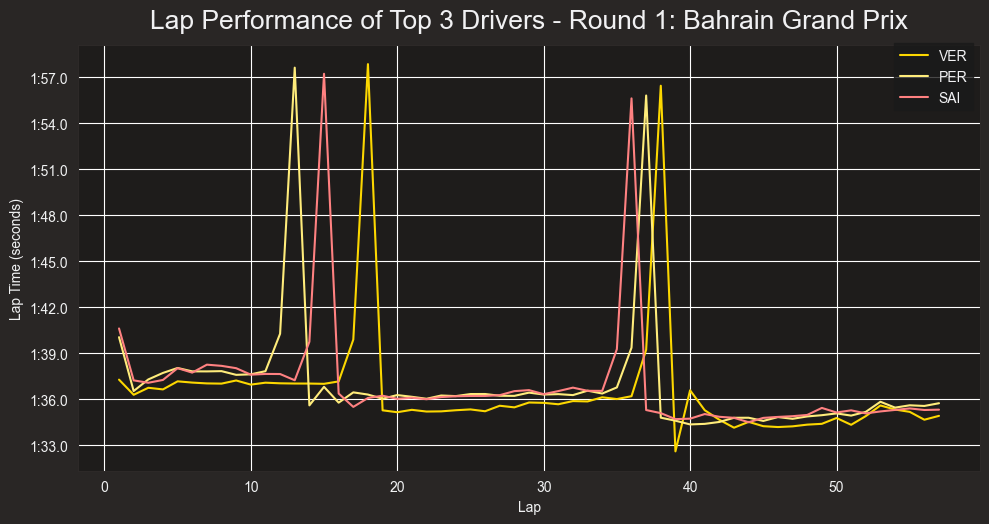

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



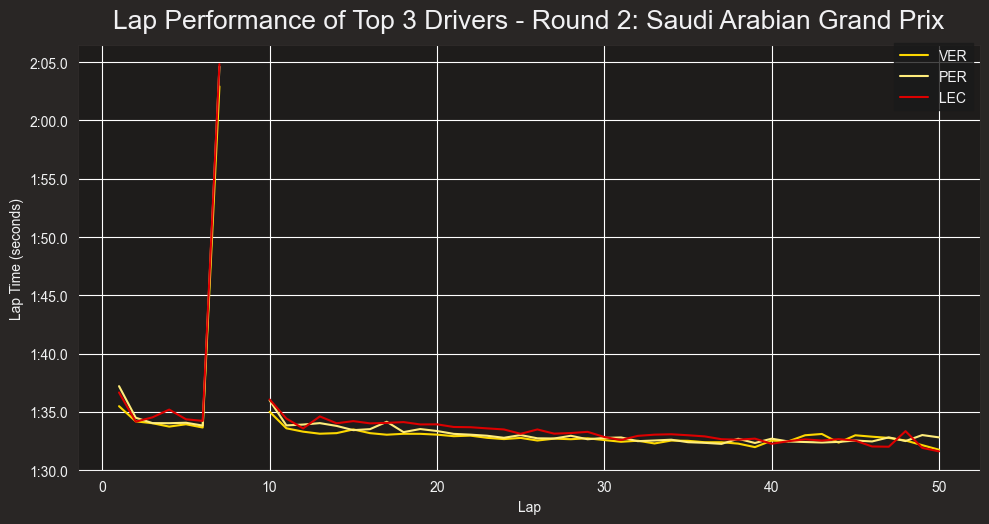

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



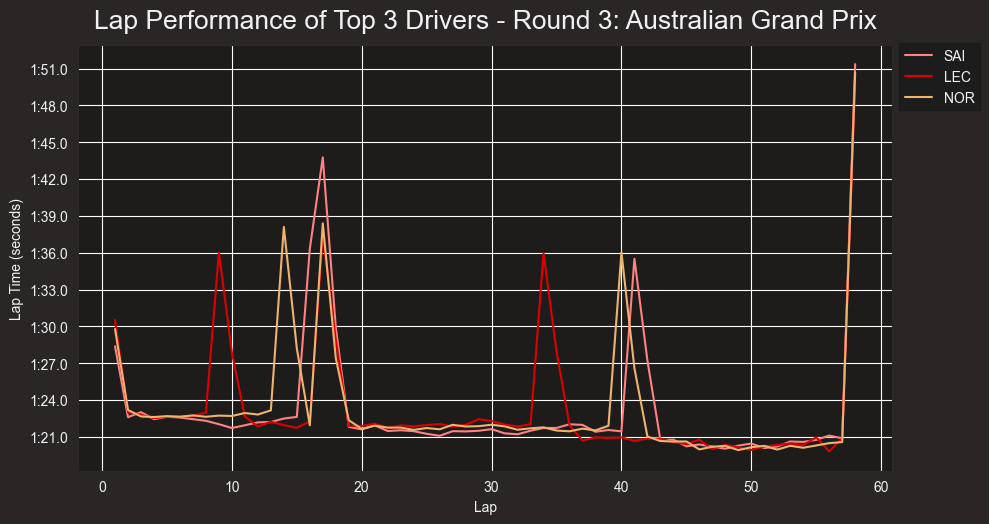

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



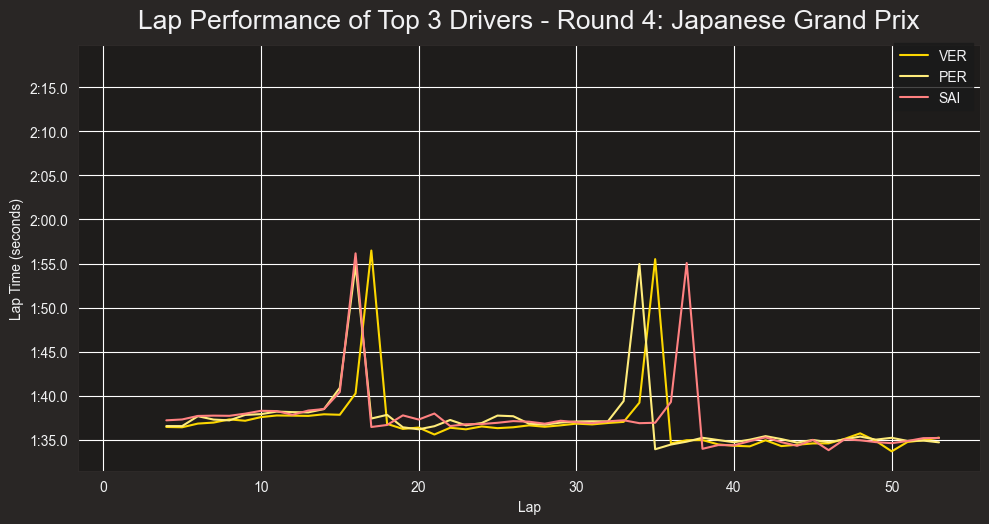

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



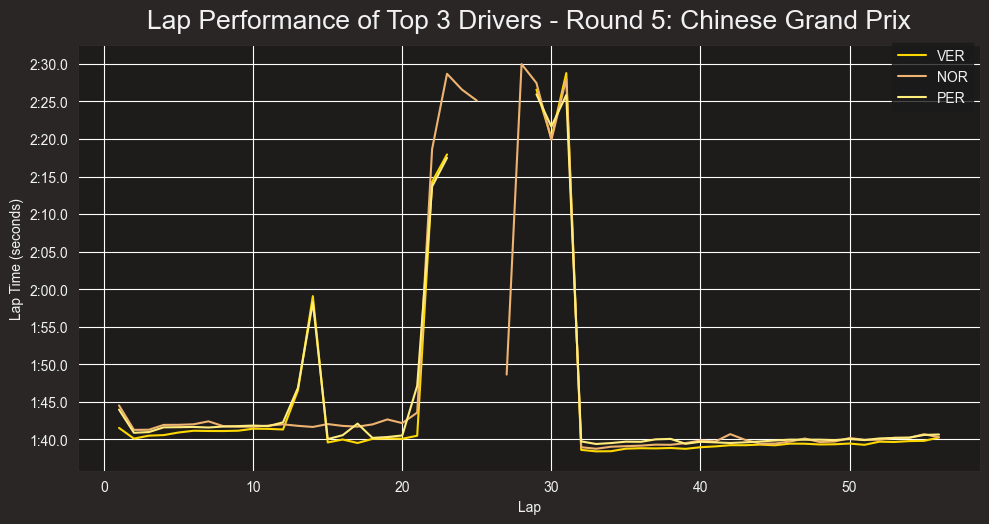

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



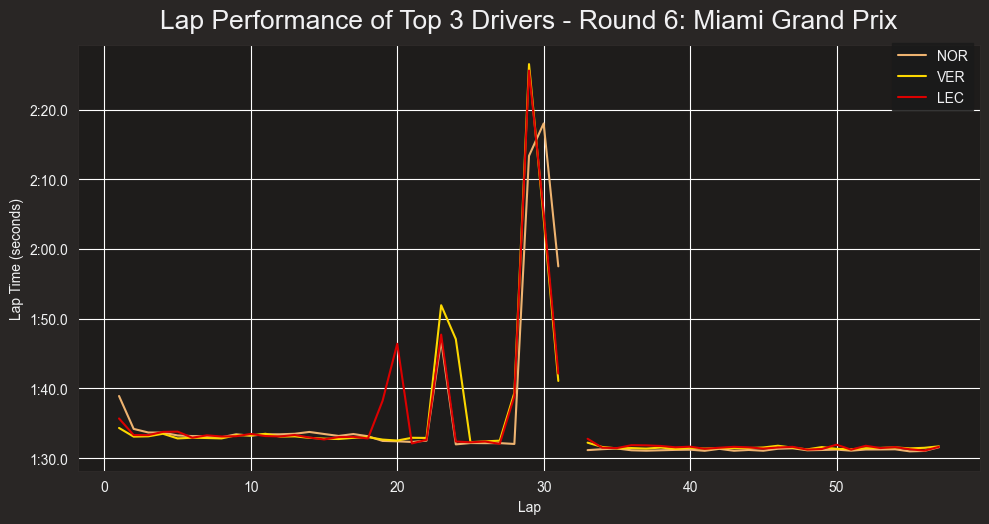

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



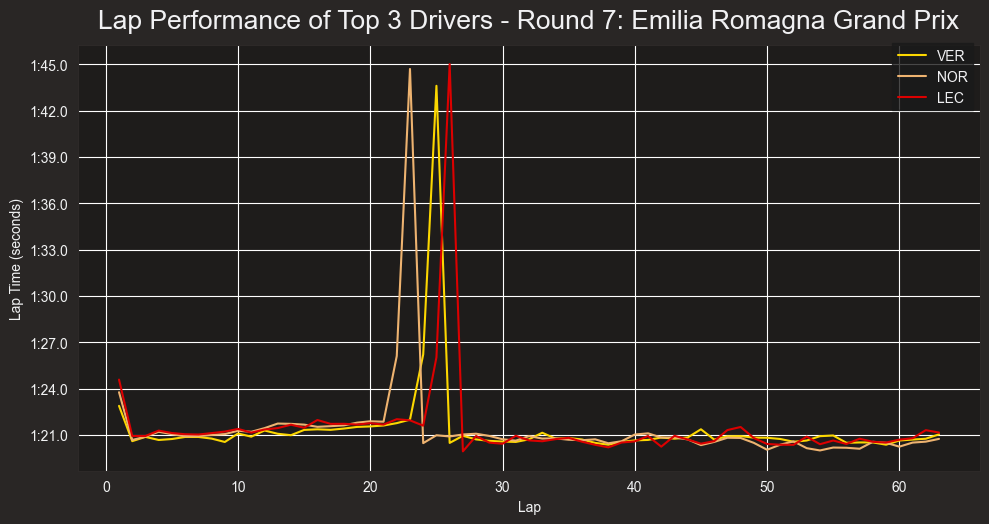

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



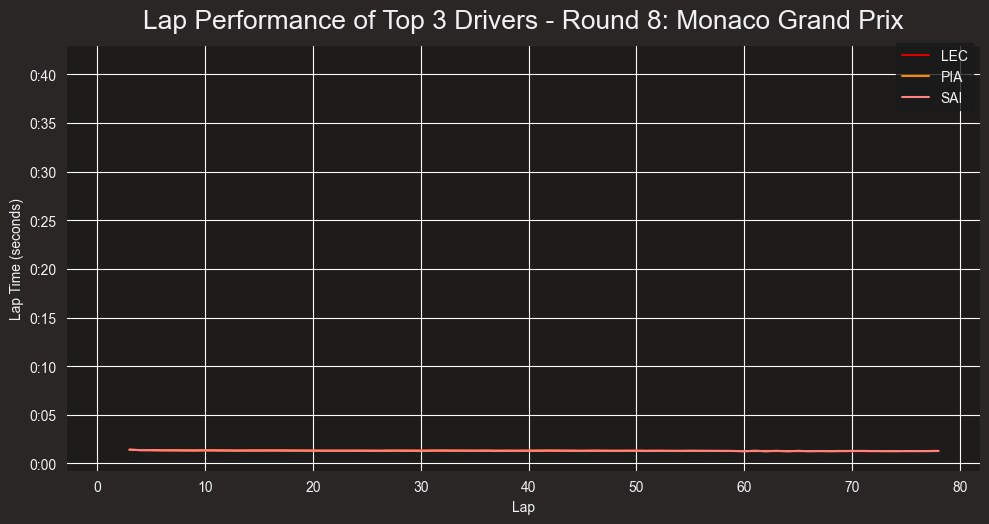

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



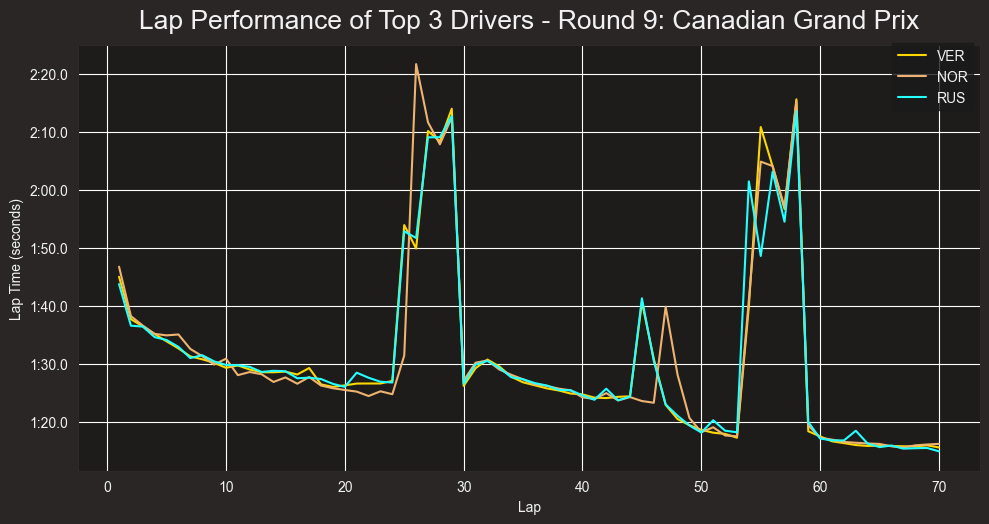

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



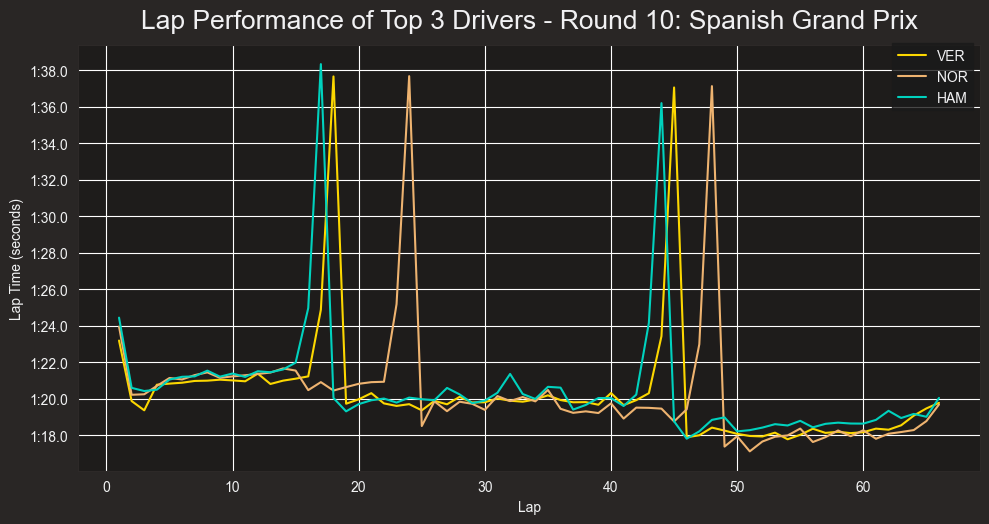

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



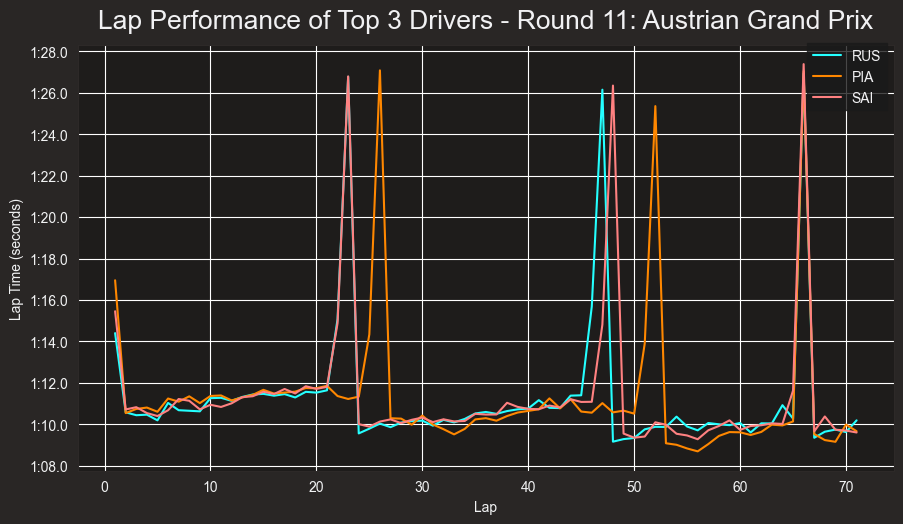

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



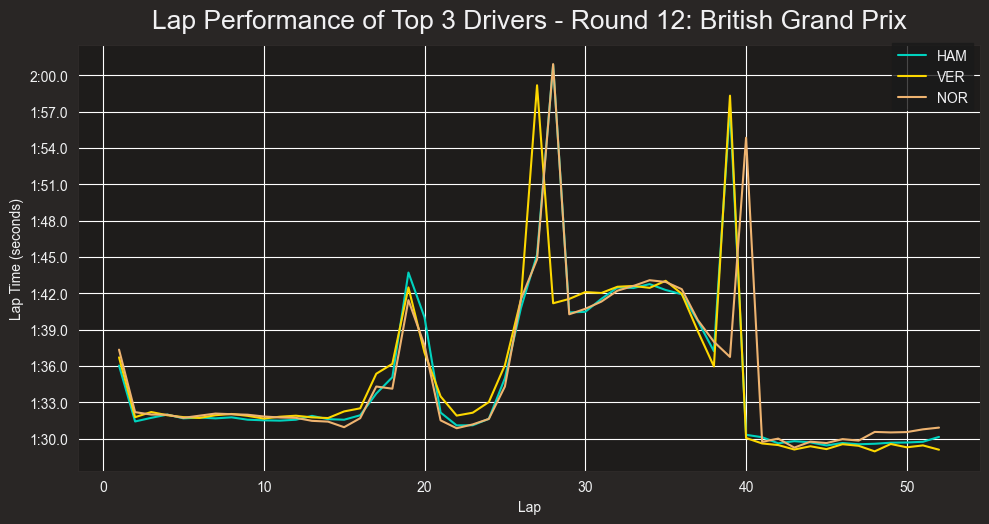

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



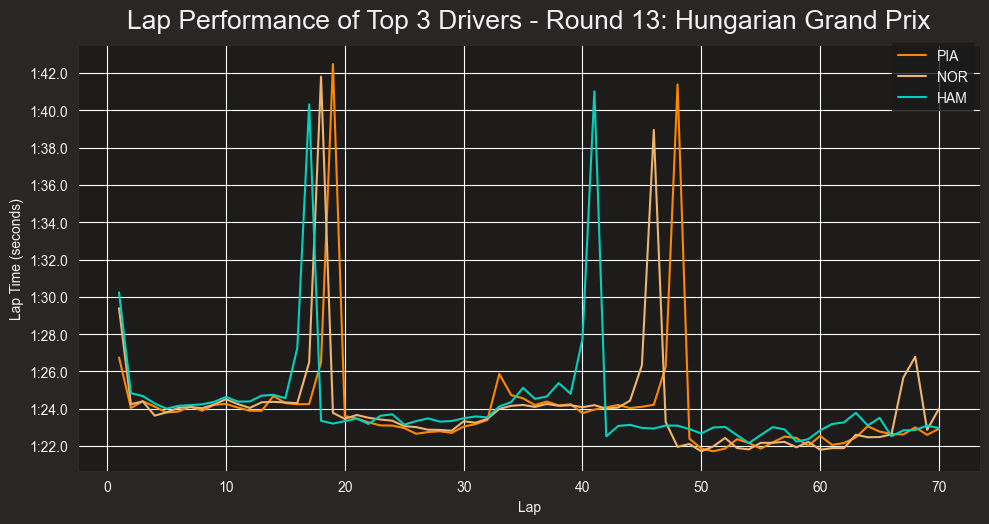

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



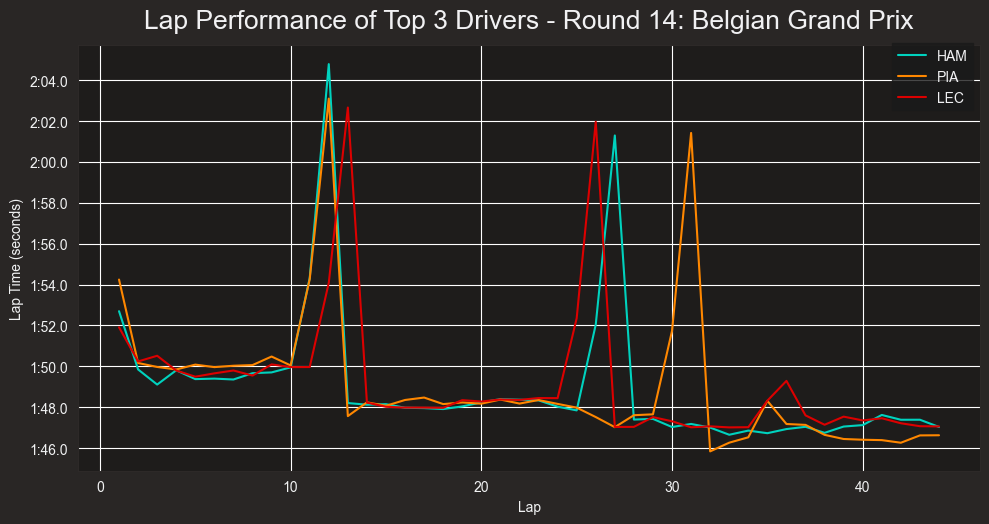

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



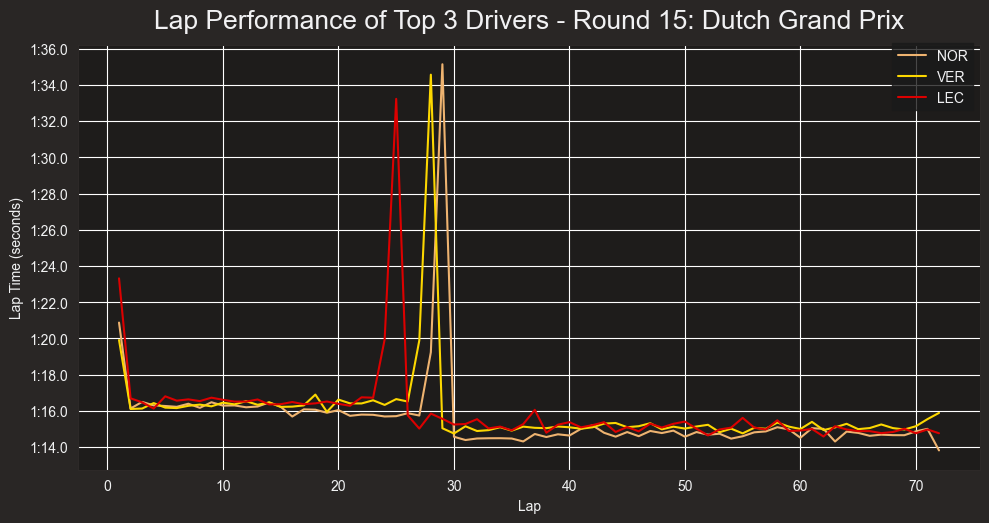

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



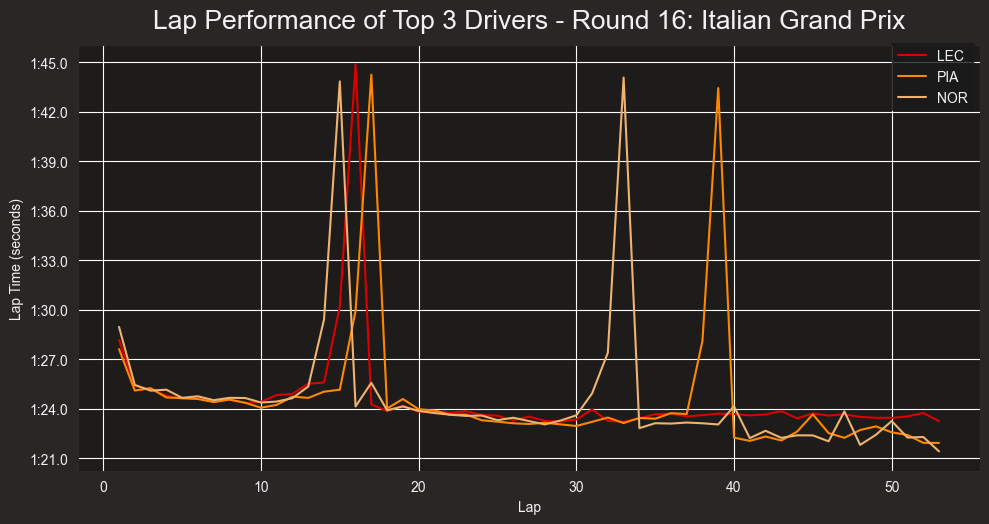

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



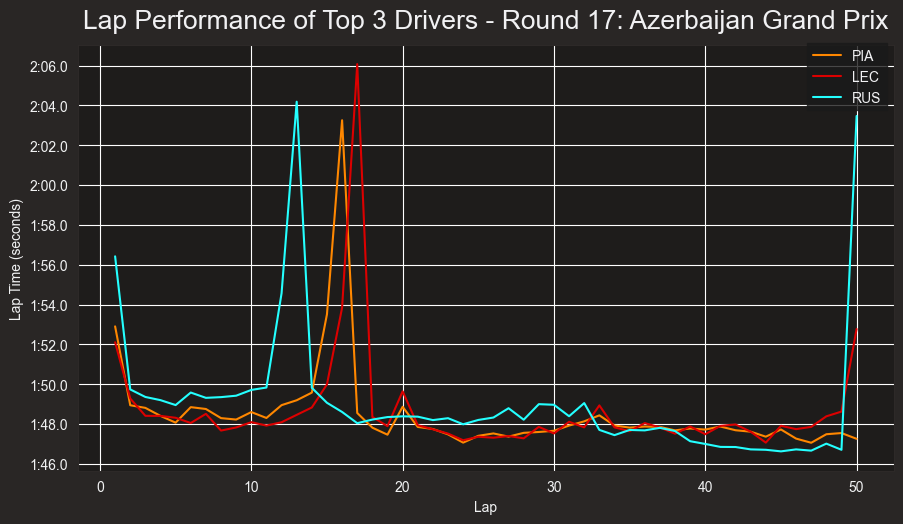

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



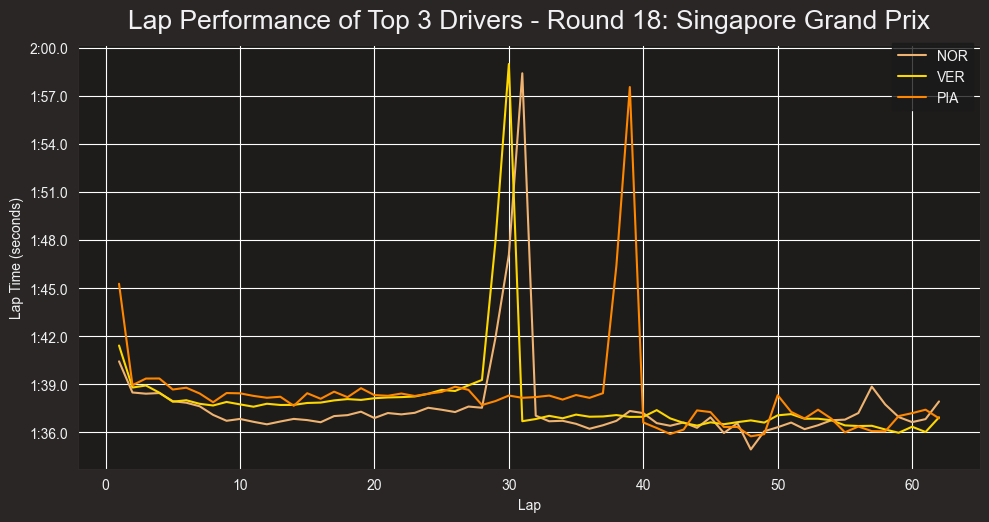

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



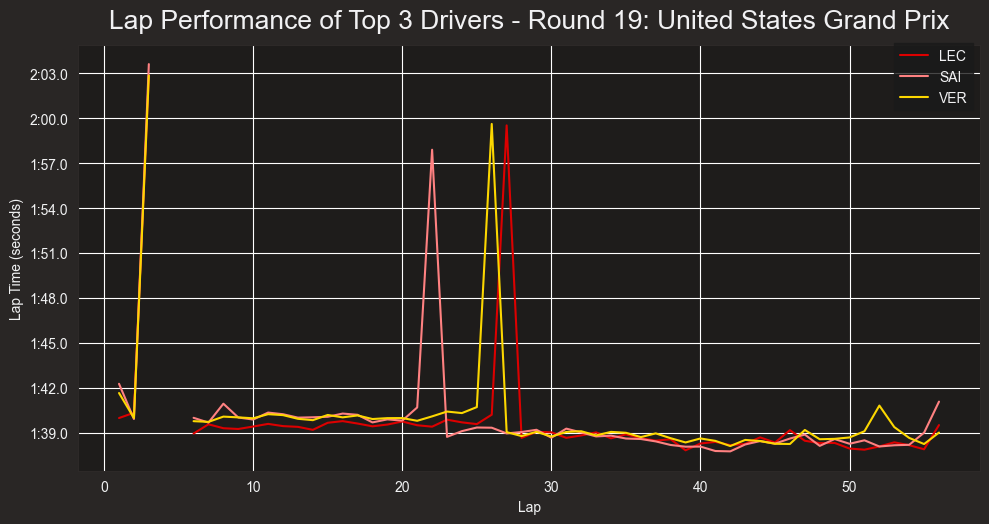

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



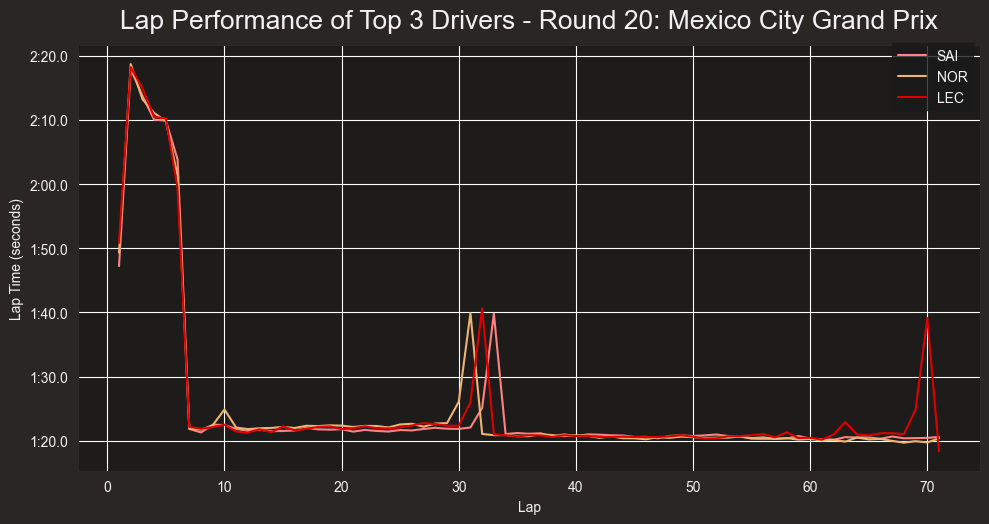

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



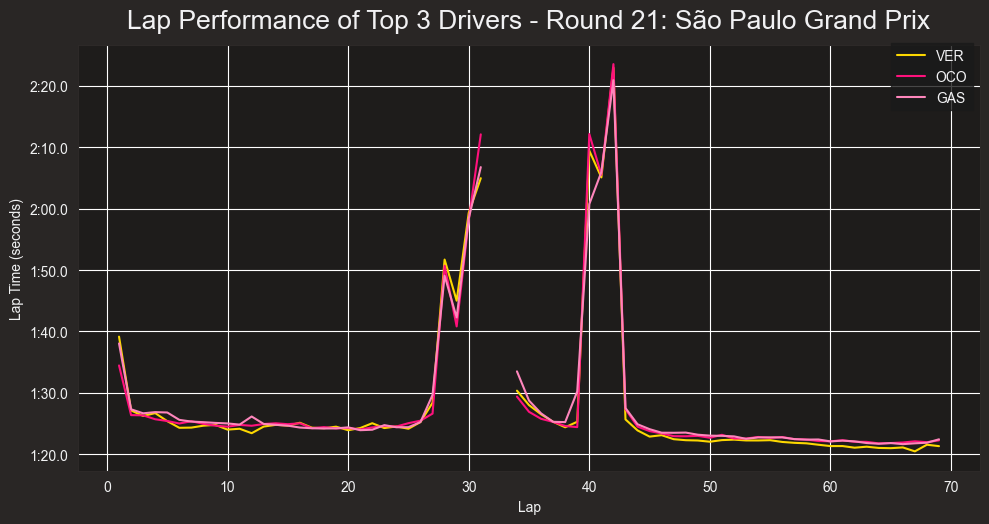

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



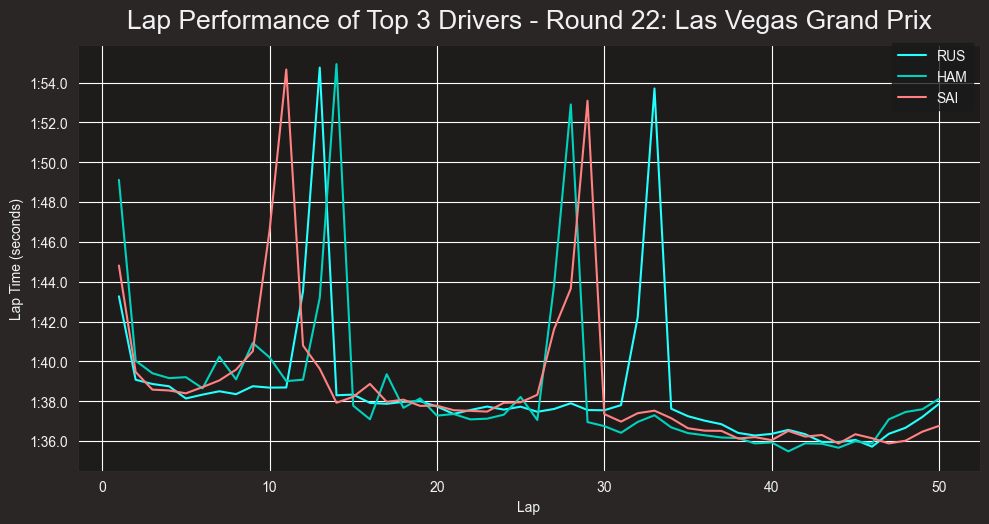

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



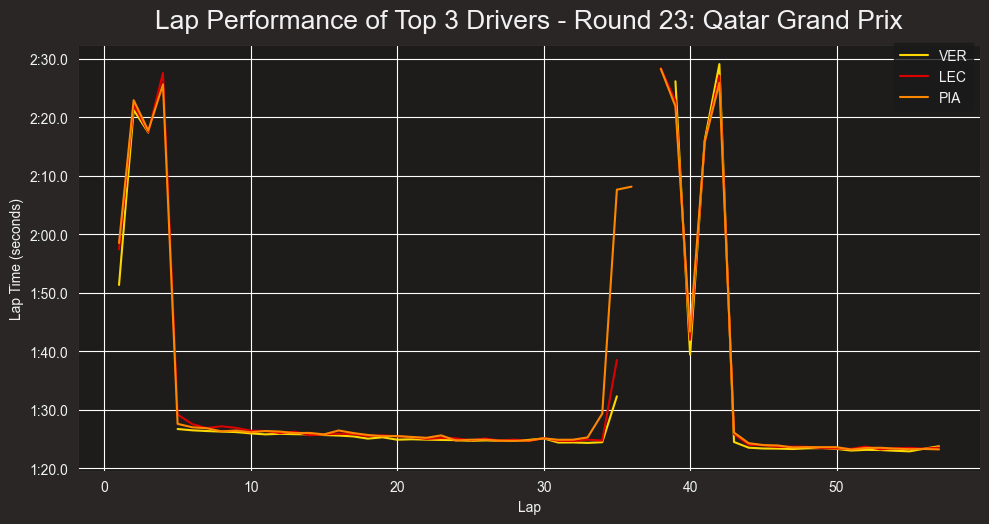

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.



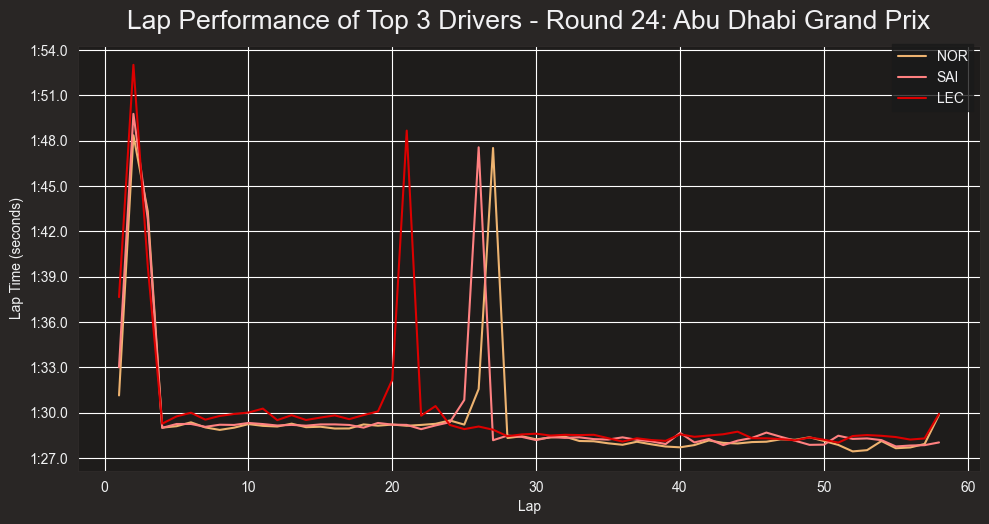

In [72]:


f1plot.setup_mpl(misc_mpl_mods=False)
for round_number, session in cached_sessions.items():
    results = session.results
    
    # Getting top 3 drivers based on final positions
    top_3_drivers = results.nsmallest(3, 'Position')['Abbreviation'].tolist()
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    for driver in top_3_drivers:
        driver_laps = session.laps.pick_driver(driver)
        
        if not driver_laps.empty:
            abb = driver_laps['Driver'].iloc[0]
            color = f1plot.driver_color(abb)
            
            # Plotting the lap time throughout the race
            ax.plot(driver_laps['LapNumber'], driver_laps['LapTime'], label=abb, color=color)
    
    ax.set_xlabel('Lap')
    ax.set_ylabel('Lap Time (seconds)')
    
   
    ax.legend(bbox_to_anchor=(1.0, 1.02))
    plt.tight_layout()
    plt.title(f"Lap Performance of Top 3 Drivers - Round {round_number}: {round_to_track[round_number]}")
    plt.show()

#### Tyre Stints 

In [73]:
all_stints = []

# Iterate through all cached sessions
for round_number, session in cached_sessions.items():
    laps = session.laps.copy()
    laps['Race'] = round_to_track[round_number]  # Add race name using mapping

    # Extract and group stint data
    stints = laps[['Race', 'Driver', 'Stint', 'Compound', 'LapNumber']]
    stints = stints.groupby(['Race', 'Driver', 'Stint', 'Compound']).count().reset_index()
    stints = stints.rename(columns={'LapNumber': 'StintLength'})

    # Store in list
    all_stints.append(stints)
    # Combine all stints data into a single DataFrame
all_stints_df = pd.concat(all_stints, ignore_index=True)


In [74]:
all_stints_df

Race Driver  Stint Compound  StintLength
0       Bahrain Grand Prix    ALB    1.0     SOFT           15
1       Bahrain Grand Prix    ALB    2.0     HARD           21
2       Bahrain Grand Prix    ALB    3.0     HARD           20
3       Bahrain Grand Prix    ALO    1.0     SOFT           15
4       Bahrain Grand Prix    ALO    2.0     HARD           26
...                    ...    ...    ...      ...          ...
1297  Abu Dhabi Grand Prix    VER    1.0   MEDIUM           29
1298  Abu Dhabi Grand Prix    VER    2.0     HARD           29
1299  Abu Dhabi Grand Prix    ZHO    1.0   MEDIUM           12
1300  Abu Dhabi Grand Prix    ZHO    2.0     HARD           27
1301  Abu Dhabi Grand Prix    ZHO    3.0     HARD           18

[1302 rows x 5 columns]

In [75]:
compound_colors = {
    'SOFT': 'Red',
    'MEDIUM': 'Yellow',
    'HARD': 'White',
    'WET': 'Blue',
    'INTERMEDIATE': 'Green'
}

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd


compound_colors = {
    'SOFT': 'Red',
    'MEDIUM': 'Yellow',
    'HARD': 'White',
    'WET': 'Blue',
    'INTERMEDIATE': 'Green'
}


for round_number, session in cached_sessions.items():
    results = session.results
    
  
    top_3_drivers = results.nsmallest(3, 'Position')['Abbreviation'].tolist()
    
    
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                        subplot_titles=("Lap Performance", "Stint Lengths by Compound"),
                        row_heights=[0.7, 0.3])

   
    legend_shapes = {}

    # Plot lap times for top 3 drivers
    for driver in top_3_drivers:
        driver_laps = session.laps.pick_driver(driver)
        
        if not driver_laps.empty:
            abb = driver_laps['Driver'].iloc[0]
            color = f1plot.driver_color(abb)
            
            # Add trace for lap times with driver name in legend
            fig.add_trace(
                go.Scatter(
                    x=driver_laps['LapNumber'],
                    y=driver_laps['LapTime'].dt.total_seconds(),  # Convert LapTime to total seconds
                    mode='lines+markers',
                    name=f"{abb} (Lap Times)", 
                    line=dict(color=color, width=2),
                    showlegend=True
                ),
                row=1, col=1
            )
            # Store for custom legend
            legend_shapes[abb] = color

    # Filter stints data for the current race
    race_stints = all_stints_df[all_stints_df['Race'] == round_to_track[round_number]]
    top_3_race_stints = race_stints[race_stints['Driver'].isin(top_3_drivers)]
    
    previous_stint_end = {}

    # Plot stint lengths with tire compounds
    for _, row in top_3_race_stints.iterrows():
        driver = row['Driver']
        if driver not in previous_stint_end:
            previous_stint_end[driver] = 0

        # Add bar for stint length with compound color and label
        fig.add_trace(
            go.Bar(
                x=[row['StintLength']],
                y=[f"{driver} ({row['Compound']})"],  # Label with driver and compound
                orientation='h',
                marker=dict(color=compound_colors[row['Compound']]),
                name=f"{driver} - {row['Compound']}", 
                showlegend=True
            ),
            row=2, col=1
        )
        previous_stint_end[driver] += row['StintLength']

    
    fig.update_layout(
        title=f"Driver Race Performance - Round {round_number}: {round_to_track[round_number]}",
        template='plotly_dark',
        legend_title='Legend',
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1.1,  # Adjust position to avoid overlapping
            xanchor="left",
            x=1.1,
            title_font_size=14,
            font_size=12
        ),
        showlegend=True,  # Ensure legend is visible
        height=900,  # Increase height for better visibility
        margin=dict(l=50, r=50, t=100, b=50)  # Adjust margins for better spacing
    )

   
    fig.update_xaxes(title_text="Lap Number", row=1, col=1, title_font_size=14)
    fig.update_yaxes(title_text="Lap Time (seconds)", row=1, col=1, title_font_size=14)
    fig.update_xaxes(title_text="Stint Length (Laps)", row=2, col=1, title_font_size=14)
    fig.update_yaxes(title_text="Driver & Tire Compound", row=2, col=1, title_font_size=14)

    # Add annotations for tire compounds in the stint chart
    for driver in top_3_drivers:
        driver_stints = top_3_race_stints[top_3_race_stints['Driver'] == driver]
        for _, row in driver_stints.iterrows():
            fig.add_annotation(
                x=row['StintLength'] / 2,  # Center of the bar
                y=f"{driver} ({row['Compound']})",
                xref="x2", yref="y2",
                text=f"{row['Compound']}",  # Show compound name
                showarrow=False,
                font=dict(size=12, color="white"),
                bgcolor=compound_colors[row['Compound']],
                opacity=0.7
            )

   
    fig.show(renderer="browser")

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\plotting\_plotting.py:151: FutureWarning:

The function `driver_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_driver_color` instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022

 ## Teammate Performance Analysis

#### Function to analyze teammate head to head race battles

In [82]:
          
def get_teammate_battles():
    battles = []
    for round_number in range(1, len(schedule)):
        session = fastf1.get_session(2024, round_number, 'R')
        session.load()
        results = session.results

        for team in results['TeamName'].unique():
            team_drivers = results[results['TeamName'] == team]
            
            if len(team_drivers) == 2:
                try:
                    drivers = team_drivers[['Abbreviation', 'Position', 'Points']].sort_values('Position')
                    driver1, pos1, points1 = drivers.iloc[0]['Abbreviation'], drivers.iloc[0]['Position'], drivers.iloc[0]['Points']
                    driver2, pos2, points2 = drivers.iloc[1]['Abbreviation'], drivers.iloc[1]['Position'], drivers.iloc[1]['Points']
                    
                    team_name = team_drivers['TeamName'].iloc[0]
                    
                    battles.append({
                        'Round': round_number,
                        'Track': round_to_track[round_number],
                        'Driver1': driver1,
                        'Driver2': driver2,
                        'Team': team_name,
                        'Position1': pos1,
                        'Position2': pos2,
                        'Points1': points1,
                        'Points2': points2
                    })
                except Exception as e:
                    print(f"Error in {team} {round_number} {e}")
    return pd.DataFrame(battles)


In [83]:
teammate_battles = get_teammate_battles()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
core           INFO 	Loading data for Saudi Arabian Grand Prix

In [84]:
unique_teams = teammate_battles['Team'].unique()
print(unique_teams)

['Red Bull Racing' 'Ferrari' 'Mercedes' 'McLaren' 'Aston Martin'
 'Kick Sauber' 'Haas F1 Team' 'RB' 'Williams' 'Alpine']


In [85]:
team_colors = {
    'Red Bull Racing':'#3671C6',
    'Ferrari': '#E8002D',
    'Mercedes':'#27F4D2',
    'McLaren':'#FF8000',
    'Aston Martin':'#229971',
    'Alpine':'#FF87BC',
    'Kick Sauber': '#52E252',
    'Haas F1 Team':'#B6BABD',
    'RB':'#6692FF',
    'Williams':'#64C4FF'
}

#### Race Finish Comparisions

In [109]:
import plotly.graph_objects as go




unique_teams = teammate_battles['Team'].unique()


for team_name in unique_teams:
    
    team_data = teammate_battles[teammate_battles['Team'] == team_name]
    
    if not team_data.empty:
        
        fig = go.Figure()

        
        fig.add_trace(
            go.Scatter(
                x=team_data['Track'],  
                y=team_data['Position1'],  
                mode='lines+markers',
                name=team_data['Driver1'].iloc[0],  
                marker=dict(size=10),
                text=team_data['Driver1'],
                hovertemplate='<b>Round</b>: %{customdata[0]}<br><b>Track</b>: %{x}<br><b>Driver</b>: %{text}<br><b>Position</b>: %{y}',
                customdata=team_data[['Round', 'Driver1']]
            )
        )

        
        fig.add_trace(
            go.Scatter(
                x=team_data['Track'], 
                y=team_data['Position2'],  
                mode='lines+markers',
                name=team_data['Driver2'].iloc[0], 
                marker=dict(size=10),
                text=team_data['Driver2'],
                hovertemplate='<b>Round</b>: %{customdata[0]}<br><b>Track</b>: %{x}<br><b>Driver</b>: %{text}<br><b>Position</b>: %{y}',
                customdata=team_data[['Round', 'Driver2']]
            )
        )

        
        fig.update_layout(
            title=f'Teammate Performance Comparison for {team_name}',
            xaxis_title='Track',
            yaxis_title='Finishing Position',
            legend_title='Drivers',
            legend=dict(
                orientation="v",
                yanchor="top",
                y=1.05,
                xanchor="left",
                x=1.05
            ),
            template='plotly_dark',
            yaxis=dict(
                autorange="reversed",  
                tickmode='linear',     
                dtick=1       #setting position interval to 1          
            )
        )


        
        fig.show(renderer="browser")
    else:
        print(f"No data available for {team_name}.")

#### updated code with substituted and replaced drivers handled

In [111]:
def get_teammate_battles():
    battles = []

    # Special driver replacements (subs = temporary, replacements = full-time switch)
    subs = {
        "Ferrari": {2: "BEA"},  # Bearman for Sainz in Round 2
        "Haas F1 Team": {20: "BEA", 21: "BEA"},  # Bearman for Magnussen
        "Alpine F1 Team": {24: "DOO"},  # Doohan for Ocon in Round 24
    }
    replacements = {
        "RB": {round_num: "LAW" for round_num in range(18, 25)}  # Lawson replaced Ricciardo
    }

    for round_number in range(1, len(schedule)):
        session = fastf1.get_session(2024, round_number, 'R')
        session.load()
        results = session.results

        for team in results['TeamName'].unique():
            team_drivers = results[results['TeamName'] == team]

            if len(team_drivers) == 2:
                try:
                    drivers = team_drivers[['Abbreviation', 'Position', 'Points']].sort_values('Position')
                    driver1, pos1, points1 = drivers.iloc[0]['Abbreviation'], drivers.iloc[0]['Position'], drivers.iloc[0]['Points']
                    driver2, pos2, points2 = drivers.iloc[1]['Abbreviation'], drivers.iloc[1]['Position'], drivers.iloc[1]['Points']

                    team_name = team_drivers['TeamName'].iloc[0]

                    # Handle temporary substitutions
                    if team_name in subs and round_number in subs[team_name]:
                        sub_driver = subs[team_name][round_number]
                        if driver1 in subs[team_name].values():
                            driver1 = sub_driver
                        else:
                            driver2 = sub_driver

                    # Handle full-time replacements (LAW replacing RIC)
                    if team_name in replacements and round_number in replacements[team_name]:
                        new_driver = replacements[team_name][round_number]
                        if driver1 == "RIC":
                            driver1 = new_driver
                        elif driver2 == "RIC":
                            driver2 = new_driver

                    battles.append({
                        'Round': round_number,
                        'Track': round_to_track[round_number],
                        'Driver1': driver1,
                        'Driver2': driver2,
                        'Team': team_name,
                        'Position1': pos1,
                        'Position2': pos2,
                        'Points1': points1,
                        'Points2': points2
                    })
                except Exception as e:
                    print(f"Error in {team} Round {round_number}: {e}")

    return pd.DataFrame(battles)


In [113]:
teammate_battles_new = get_teammate_battles()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
core           INFO 	Loading data for Saudi Arabian Grand Prix

In [114]:
import plotly.graph_objects as go

unique_teams = teammate_battles_new['Team'].unique()

for team_name in unique_teams:
    team_data = teammate_battles_new[teammate_battles_new['Team'] == team_name]
    
    if not team_data.empty:
        fig = go.Figure()

        # Get unique drivers to correctly label traces
        unique_drivers = set(team_data['Driver1']).union(set(team_data['Driver2']))

        for driver in unique_drivers:
            driver_data = team_data[(team_data['Driver1'] == driver) | (team_data['Driver2'] == driver)]
            
            # Ensure the correct position column is selected for each driver
            driver_positions = []
            driver_tracks = []
            for _, row in driver_data.iterrows():
                if row['Driver1'] == driver:
                    driver_positions.append(row['Position1'])
                else:
                    driver_positions.append(row['Position2'])
                driver_tracks.append(row['Track'])

            # Plot each driver as a separate trace
            fig.add_trace(
                go.Scatter(
                    x=driver_tracks,
                    y=driver_positions,
                    mode='lines+markers',
                    name=driver,
                    marker=dict(size=10),
                    text=[driver] * len(driver_tracks),
                    hovertemplate='<b>Round</b>: %{customdata[0]}<br><b>Track</b>: %{x}<br><b>Driver</b>: %{text}<br><b>Position</b>: %{y}',
                    customdata=list(zip(driver_data['Round'], [driver] * len(driver_tracks)))
                )
            )

        fig.update_layout(
            title=f'Teammate Performance Comparison for {team_name}',
            xaxis_title='Track',
            yaxis_title='Finishing Position',
            legend_title='Drivers',
            legend=dict(
                orientation="v",
                yanchor="top",
                y=1.05,
                xanchor="left",
                x=1.05
            ),
            template='plotly_dark',
            yaxis=dict(
                autorange="reversed",  
                tickmode='linear',     
                dtick=1               
            )
        )

        fig.show(renderer="browser")
    else:
        print(f"No data available for {team_name}.")


#### Function to analyze teammate battles in Quali

In [88]:
def get_teammate_battles_quali():
    battles = [ ]
    for round_number in range(1, len(schedule)):
        session = fastf1.get_session(2024,round_number,'Q')
        session.load()
        results = session.results

        for team in results['TeamName'].unique():
            team_drivers = results[results['TeamName']==team]
            
            if len(team_drivers)==2:
                try:
                    drivers = team_drivers[['Abbreviation','Position']].sort_values('Position')
                    driver1,pos1 = drivers.iloc[0]['Abbreviation'],drivers.iloc[0]['Position']
                    driver2,pos2 = drivers.iloc[1]['Abbreviation'],drivers.iloc[1]['Position']
                    # driver3,pos3 = drivers.iloc[2]['Abbreviation'],drivers.iloc[2]['Position']
                    team_name = team_drivers['TeamName'].iloc[0]

                    battles.append({
                        'Round':round_number,
                        'Track' : round_to_track[round_number],
                        'Driver1':driver1,
                        'Driver2':driver2,
                        'Team': team_name,
                        'Position1':pos1,
                        'Position2':pos2,
                        
                    }
                    )
                except Exception as e :
                    print(f"Error in {team} {round_number} {e}")
    return pd.DataFrame(battles)

In [90]:
teammate_battles_q = get_teammate_battles_quali()
teammate_battles_q

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '11', '14', '4', '81', '44', '27', '22', '18', '23', '3', '20', '77', '24', '2', '31', '10']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Usi

Round                 Track Driver1 Driver2             Team  Position1  \
0        1    Bahrain Grand Prix     VER     PER  Red Bull Racing        1.0   
1        1    Bahrain Grand Prix     LEC     SAI          Ferrari        2.0   
2        1    Bahrain Grand Prix     RUS     HAM         Mercedes        3.0   
3        1    Bahrain Grand Prix     ALO     STR     Aston Martin        6.0   
4        1    Bahrain Grand Prix     NOR     PIA          McLaren        7.0   
..     ...                   ...     ...     ...              ...        ...   
234     24  Abu Dhabi Grand Prix     RUS     HAM         Mercedes        7.0   
235     24  Abu Dhabi Grand Prix     ALO     STR     Aston Martin        8.0   
236     24  Abu Dhabi Grand Prix     BOT     ZHO      Kick Sauber        9.0   
237     24  Abu Dhabi Grand Prix     TSU     LAW               RB       11.0   
238     24  Abu Dhabi Grand Prix     ALB     COL         Williams       16.0   

     Position2  
0          5.0  
1          4.0  
2          9.0  
3         12.0  
4          8.0  
..         ...  
234       18.0  
235       13.0  
236       17.0  
237       12.0  
238       19.0  

[239 rows x 7 columns]


#### Updated Function for analyzing quali battles

In [ ]:
def get_teammate_battles_quali():
    battles = []
    
    # Special driver replacements (subs = temporary, replacements = full-time switch)
    subs = {
        "Ferrari": {2: "BEA"},  # Bearman for Sainz in Round 2 Saudi 
        "Haas F1 Team": {20: "BEA", 21: "BEA"},  # Bearman for Magnussen in Rounds 20 and 21
        "Alpine F1 Team": {24: "DOO"},  # Doohan for Ocon in Round 24
    }
    replacements = {
        "RB": {round_num: "LAW" for round_num in range(19, 25)}  # Lawson replaced Ricciardo after round 18 
    }
    
    for round_number in range(1, len(schedule)):
        session = fastf1.get_session(2024, round_number, 'Q')
        session.load()
        results = session.results

        for team in results['TeamName'].unique():
            team_drivers = results[results['TeamName'] == team]
            
            if len(team_drivers) == 2:
                try:
                    drivers = team_drivers[['Abbreviation', 'Position']].sort_values('Position')
                    driver1, pos1 = drivers.iloc[0]['Abbreviation'], drivers.iloc[0]['Position']
                    driver2, pos2 = drivers.iloc[1]['Abbreviation'], drivers.iloc[1]['Position']
                    team_name = team_drivers['TeamName'].iloc[0]

                    # Handle temporary substitutions
                    if team_name in subs and round_number in subs[team_name]:
                        sub_driver = subs[team_name][round_number]
                        if driver1 in subs[team_name].values():
                            driver1 = sub_driver
                        else:
                            driver2 = sub_driver

                    # Handle full-time replacements (LAW replacing RIC)
                    if team_name in replacements and round_number in replacements[team_name]:
                        new_driver = replacements[team_name][round_number]
                        if driver1 == "RIC":
                            driver1 = new_driver
                        elif driver2 == "RIC":
                            driver2 = new_driver

                    battles.append({
                        'Round': round_number,
                        'Track': round_to_track[round_number],
                        'Driver1': driver1,
                        'Driver2': driver2,
                        'Team': team_name,
                        'Position1': pos1,
                        'Position2': pos2,
                    })

                except Exception as e:
                    print(f"Error in {team} {round_number}: {e}")

    return pd.DataFrame(battles)


#### Quali Position Comparisons

In [106]:
import plotly.graph_objects as go

unique_teams = teammate_battles_q['Team'].unique()

for team_name in unique_teams:
    
    team_data = teammate_battles_q[teammate_battles_q['Team'] == team_name]

    if not team_data.empty:
        
        fig = go.Figure()

        # Get unique drivers for the team, considering subs
        all_drivers = set(team_data['Driver1']).union(set(team_data['Driver2']))

        # Define special cases where substitutes were used
        subs = {
            "Ferrari": {2: "BEA"},  # Round 2: Bearman for Sainz
            "Haas": {17: "BEA", 18: "BEA"},  # Rounds 17-18: Bearman for Magnussen
            "Alpine": {24: "DOO"}  # Round 22: Doohan for Ocon
            # "RB":{19:"LAW",20:"LAW",21:"LAW",22:"LAW",23:"LAW",24:"LAW"}
        }

        for driver in all_drivers:
            driver_data = team_data[(team_data['Driver1'] == driver) | (team_data['Driver2'] == driver)]
            driver_data = driver_data.sort_values(by='Round')

            # Get rounds, tracks, and qualifying positions for each driver
            rounds = driver_data['Round']
            tracks = driver_data['Track']
            positions = driver_data.apply(
                lambda row: row['Position1'] if row['Driver1'] == driver else row['Position2'], axis=1
            )

            # Handle special cases (substitutes)
            driver_rounds = list(rounds)
            driver_tracks = list(tracks)
            driver_positions = list(positions)

            # Create a new trace for any substitute rounds
            sub_rounds = subs.get(team_name, {})

            # Remove rounds where the driver was absent
            filtered_rounds = []
            filtered_tracks = []
            filtered_positions = []
            
            for i in range(len(driver_rounds)):
                round_num = driver_rounds[i]
                if round_num in sub_rounds and sub_rounds[round_num] != driver:
                    continue  # Skip this round for the original driver
                filtered_rounds.append(driver_rounds[i])
                filtered_tracks.append(driver_tracks[i])
                filtered_positions.append(driver_positions[i])

            # Plot main driver's qualifying data
            fig.add_trace(
                go.Scatter(
                    x=filtered_tracks,
                    y=filtered_positions,
                    mode='lines+markers',
                    name=driver,
                    marker=dict(size=10),
                    hovertemplate='<b>Track</b>: %{x}<br><b>Driver</b>: %{text}<br><b>Position</b>: %{y}',
                    text=[driver] * len(filtered_tracks),
                )
            )

            # Add substitute drivers as separate traces
            for sub_round, sub_driver in sub_rounds.items():
                sub_data = team_data[team_data['Round'] == sub_round]
                sub_track = sub_data['Track'].values[0]
                sub_position = (
                    sub_data['Position1'].values[0] if sub_data['Driver1'].values[0] == sub_driver else sub_data['Position2'].values[0]
                )

                fig.add_trace(
                    go.Scatter(
                        x=[sub_track],
                        y=[sub_position],
                        mode='markers',
                        name=sub_driver,
                        marker=dict(size=12, symbol="diamond"),
                        hovertemplate=f"<b>Track</b>: {sub_track}<br><b>Driver</b>: {sub_driver}<br><b>Position</b>: {sub_position}",
                    )
                )

        fig.update_layout(
            title=f'Teammate Quali Comparison for {team_name}',
            xaxis_title='Track',
            yaxis_title='Qualifying Position',
            legend_title='Drivers',
            template='plotly_dark',
            yaxis=dict(
                autorange="reversed",
                tickmode='linear',
                dtick=1
            ),
            xaxis=dict(tickangle=-45),
        )

        fig.show(renderer="browser")

    else:
        print(f"No data available for {team_name}.")


#### Point Progression Comparison

In [107]:

teammate_battles['Cumulative_Points1'] = 0
teammate_battles['Cumulative_Points2'] = 0


cumulative_points = {}

# Calculating cumulative points for each driver
for index, row in teammate_battles.iterrows():
    driver1 = row['Driver1']
    driver2 = row['Driver2']
    points1 = row['Points1']
    points2 = row['Points2']
    
    # Updating cumulative points for Driver1
    if driver1 in cumulative_points:
        cumulative_points[driver1] += points1
    else:
        cumulative_points[driver1] = points1
    
    # Updating cumulative points for Driver2
    if driver2 in cumulative_points:
        cumulative_points[driver2] += points2
    else:
        cumulative_points[driver2] = points2
    
    # Updating the DataFrame with the new cumulative points
    teammate_battles.at[index, 'Cumulative_Points1'] = cumulative_points[driver1]
    teammate_battles.at[index, 'Cumulative_Points2'] = cumulative_points[driver2]



#### Teammate Points Progression throughout the season

In [108]:
import plotly.graph_objects as go


unique_teams = teammate_battles['Team'].unique()


for team_name in unique_teams:
 
    team_data = teammate_battles[teammate_battles['Team'] == team_name]
    
    if not team_data.empty:
    
        fig = go.Figure()


        fig.add_trace(
            go.Scatter(
                x=team_data['Track'], 
                y=team_data['Cumulative_Points1'],  
                mode='lines+markers',
                name=team_data['Driver1'].iloc[0], 
                marker=dict(size=10),
                text=team_data['Driver1'],
                hovertemplate='<b>Track</b>: %{x}<br><b>Driver</b>: %{text}<br><b>Cumulative Points</b>: %{y}',
                customdata=team_data[['Round', 'Driver1']]
            )
        )

        
        fig.add_trace(
            go.Scatter(
                x=team_data['Track'], 
                y=team_data['Cumulative_Points2'], 
                mode='lines+markers',
                name=team_data['Driver2'].iloc[0],  
                marker=dict(size=10),
                text=team_data['Driver2'],
                hovertemplate='<b>Track</b>: %{x}<br><b>Driver</b>: %{text}<br><b>Cumulative Points</b>: %{y}',
                customdata=team_data[['Round', 'Driver2']]
            )
        )

        
        fig.update_layout(
            title=f'Cumulative Points Progression for {team_name}',
            xaxis_title='Track',
            yaxis_title='Cumulative Points',
            legend_title='Drivers',
            legend=dict(
                orientation="v",
                yanchor="top",
                y=1.05,
                xanchor="left",
                x=1.05
            ),
            template='plotly_dark'
        )

        # Show the plot
        fig.show(renderer="browser")
    else:
        print(f"No data available for {team_name}.")

#### Function to analyze car development progression

In [49]:
def get_car_progression():
    progression = []
    for round_number in range(1, len(schedule)):
        session = fastf1.get_session(2024, round_number, 'R')
        session.load()
        results = session.results

        
        team_avg_position = results.groupby('TeamName')['Position'].mean().reset_index()
        team_avg_position['Round'] = round_number
        team_avg_position['Track'] = round_to_track[round_number]

        for _, row in team_avg_position.iterrows():
            progression.append({
                'Round': row['Round'],
                'Track': row['Track'],
                'Team': row['TeamName'],
                'AvgPosition': row['Position']
            })

    return pd.DataFrame(progression)

In [50]:
car_progression = get_car_progression()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/1/results.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desktop\F1 2024 S

In [51]:
unique_teams

array(['Red Bull Racing', 'Ferrari', 'Mercedes', 'McLaren',
       'Aston Martin', 'Kick Sauber', 'Haas F1 Team', 'RB', 'Williams',
       'Alpine'], dtype=object)

#### Average Finishing Positions of each time 

In [52]:
for team_name in unique_teams:
    # Filter the data for the current team
    team_data = car_progression[car_progression['Team'] == team_name]
    
    if not team_data.empty:
        fig = px.line(
            team_data,
            x='Track',  
            y='AvgPosition',
            hover_data=['Round'],
            title=f'Average Finishing Position Progression for {team_name}',
            template='plotly_dark'
        )

        fig.update_layout(
            xaxis_title='Track',
            yaxis_title='Average Finishing Position',
            legend_title='Teams',
            legend=dict(
                orientation="v",
                yanchor="top",
                y=1.05,
                xanchor="left",
                x=1.05
            ),
            yaxis=dict(autorange="reversed") 
        )

        
        fig.show(renderer="browser")
    else:
        print(f"No data available for {team_name}.")

## Track based Comparisions

#### Creating a dictionary for track types and track characteristics

In [53]:
track_characteristics = {
    'Bahrain Grand Prix': {'TrackType': 'Permanent', 'TrackCharacteristics': 'mix of high-speed straights and slow corners'},
    'Saudi Arabian Grand Prix': {'TrackType': 'Street', 'TrackCharacteristics': 'High-speed street circuit'},
    'Australian Grand Prix': {'TrackType': 'Street', 'TrackCharacteristics': 'semi-street circuit medium to high-speed corners'},
    'Japanese Grand Prix': {'TrackType': 'Permanent', 'TrackCharacteristics': 'high-speed corners'},
    'Miami Grand Prix': {'TrackType': 'Permanent', 'TrackCharacteristics': 'mix of high-speed sections and tight corners'},
    'Canadian Grand Prix': {'TrackType': 'Street', 'TrackCharacteristics': 'street circuit high-speed straights and slow corners'},
    'Spanish Grand Prix': {'TrackType': 'Permanent', 'TrackCharacteristics': 'high-speed corners'},
    'Austrian Grand Prix': {'TrackType': 'Permanent', 'TrackCharacteristics': 'combination of high-speed straights and medium-speed corners'},
    'British Grand Prix': {'TrackType': 'Permanent', 'TrackCharacteristics': 'high-speed corners'},
    'Hungarian Grand Prix': {'TrackType': 'Permanent', 'TrackCharacteristics': 'slow to medium-speed corners'},
    'Belgian Grand Prix': {'TrackType': 'Permanent', 'TrackCharacteristics': 'elevation changes and high-speed corners, including the iconic Eau Rouge and Raidillon'},
    'Dutch Grand Prix': {'TrackType': 'Permanent', 'TrackCharacteristics': 'mix of high-speed and medium-speed corners; Turn 7 is a key point, taken at nearly 300 kph'},
    'Italian Grand Prix': {'TrackType': 'Permanent', 'TrackCharacteristics': 'high-speed straights and chicanes, making it one of the fastest tracks on the calendar'},
    'Singapore Grand Prix': {'TrackType': 'Street', 'TrackCharacteristics': 'street circuit slow corners'},
    'United States Grand Prix': {'TrackType': 'Permanent', 'TrackCharacteristics': 'mix of high-speed sections and technical corners'},
    'Mexican Grand Prix': {'TrackType': 'Permanent', 'TrackCharacteristics': 'combination of slow corners and high-speed chicanes'},
    'Brazilian Grand Prix': {'TrackType': 'Permanent', 'TrackCharacteristics': 'mix of high-speed and medium-speed corners'},
    'Las Vegas Grand Prix': {'TrackType': 'Street', 'TrackCharacteristics': 'street circuit with high-speed straights and challenging corners'},
    'Qatar Grand Prix': {'TrackType': 'Permanent', 'TrackCharacteristics': 'mix of medium and high-speed corners'},
    'Abu Dhabi Grand Prix': {'TrackType': 'Permanent', 'TrackCharacteristics': 'long straights with a series of technical corners, especially in the final sector'},
    'Chinese Grand Prix': {'TrackType':'Permanent','TrackCharacteristics': 'mix of high-speed straights and technical corners'}
}

In [54]:

schedule['TrackType'] = schedule['EventName'].map(lambda x: track_characteristics[x]['TrackType'] if x in track_characteristics else None)
schedule['TrackCharacteristics'] = schedule['EventName'].map(lambda x: track_characteristics[x]['TrackCharacteristics'] if x in track_characteristics else None)


schedule

RoundNumber               Country           Location  \
0             0               Bahrain             Sakhir   
1             1               Bahrain             Sakhir   
2             2          Saudi Arabia             Jeddah   
3             3             Australia          Melbourne   
4             4                 Japan             Suzuka   
5             5                 China           Shanghai   
6             6         United States              Miami   
7             7                 Italy              Imola   
8             8                Monaco             Monaco   
9             9                Canada           Montréal   
10           10                 Spain          Barcelona   
11           11               Austria          Spielberg   
12           12        United Kingdom        Silverstone   
13           13               Hungary           Budapest   
14           14               Belgium  Spa-Francorchamps   
15           15           Netherlands          Zandvoort   
16           16                 Italy              Monza   
17           17            Azerbaijan               Baku   
18           18             Singapore         Marina Bay   
19           19         United States             Austin   
20           20                Mexico        Mexico City   
21           21                Brazil          São Paulo   
22           22         United States          Las Vegas   
23           23                 Qatar             Lusail   
24           24  United Arab Emirates         Yas Island   

                                    OfficialEventName  EventDate  \
0            FORMULA 1 ARAMCO PRE-SEASON TESTING 2024 2024-02-23   
1          FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2024 2024-03-02   
2         FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2024 2024-03-09   
3          FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2024 2024-03-24   
4      FORMULA 1 MSC CRUISES JAPANESE GRAND PRIX 2024 2024-04-07   
5            FORMULA 1 LENOVO CHINESE GRAND PRIX 2024 2024-04-21   
6          FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2024 2024-05-05   
7   FORMULA 1 MSC CRUISES GRAN PREMIO DEL MADE IN ... 2024-05-19   
8                 FORMULA 1 GRAND PRIX DE MONACO 2024 2024-05-26   
9             FORMULA 1 AWS GRAND PRIX DU CANADA 2024 2024-06-09   
10        FORMULA 1 ARAMCO GRAN PREMIO DE ESPAÑA 2024 2024-06-23   
11   FORMULA 1 QATAR AIRWAYS AUSTRIAN GRAND PRIX 2024 2024-06-30   
12    FORMULA 1 QATAR AIRWAYS BRITISH GRAND PRIX 2024 2024-07-07   
13                FORMULA 1 HUNGARIAN GRAND PRIX 2024 2024-07-21   
14            FORMULA 1 ROLEX BELGIAN GRAND PRIX 2024 2024-07-28   
15           FORMULA 1 HEINEKEN DUTCH GRAND PRIX 2024 2024-08-25   
16        FORMULA 1 PIRELLI GRAN PREMIO D’ITALIA 2024 2024-09-01   
17  FORMULA 1 QATAR AIRWAYS AZERBAIJAN GRAND PRIX ... 2024-09-15   
18  FORMULA 1 SINGAPORE AIRLINES SINGAPORE GRAND P... 2024-09-22   
19    FORMULA 1 PIRELLI UNITED STATES GRAND PRIX 2024 2024-10-20   
20  FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2024 2024-10-27   
21   FORMULA 1 LENOVO GRANDE PRÊMIO DE SÃO PAULO 2024 2024-11-03   
22  FORMULA 1 HEINEKEN SILVER LAS VEGAS GRAND PRIX... 2024-11-23   
23      FORMULA 1 QATAR AIRWAYS QATAR GRAND PRIX 2024 2024-12-01   
24  FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ... 2024-12-08   

                    EventName        EventFormat    Session1  \
0          Pre-Season Testing            testing  Practice 1   
1          Bahrain Grand Prix       conventional  Practice 1   
2    Saudi Arabian Grand Prix       conventional  Practice 1   
3       Australian Grand Prix       conventional  Practice 1   
4         Japanese Grand Prix       conventional  Practice 1   
5          Chinese Grand Prix  sprint_qualifying  Practice 1   
6            Miami Grand Prix  sprint_qualifying  Practice 1   
7   Emilia Romagna Grand Prix       conventional  Practice 1   
8           Monaco Grand Prix       conventional  Practice 1   
9         Canadian Grand Prix     

In [55]:
def get_track_specific_strengths():
    strengths = []
    for round_number in range(1, len(schedule)):
        session = fastf1.get_session(2024, round_number, 'R')
        session.load()
        results = session.results
        if results.empty:
            print(f"No results available for Round {round_number}.")
            continue
        
        
        track_name = round_to_track[round_number]
        track_type = schedule.loc[round_number , 'TrackType']
        track_characteristics = schedule.loc[round_number , 'TrackCharacteristics']
        
        
        team_avg_position = results.groupby('TeamName')['Position'].mean().reset_index()
        driver_avg_position = results.groupby('Abbreviation')['Position'].mean().reset_index()
        
        # for team strengths
        for _, row in team_avg_position.iterrows():
            strengths.append({
                'Round': round_number,
                'Track': track_name,
                'TrackType': track_type,
                'TrackCharacteristics': track_characteristics,
                'Team': row['TeamName'],
                'AvgPosition': row['Position']
            })
        
        # for driver strengths
        for _, row in driver_avg_position.iterrows():
            strengths.append({
                'Round': round_number,
                'Track': track_name,
                'TrackType': track_type,
                'TrackCharacteristics': track_characteristics,
                'Driver': row['Abbreviation'],
                'AvgPosition': row['Position']
            })
    
    return pd.DataFrame(strengths)

In [56]:
strengths_df = get_track_specific_strengths()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/1/results.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desktop\F1 2024 S

In [57]:
strengths_df.loc[strengths_df['Track']=='Abu Dhabi Grand Prix']

Round                 Track  TrackType  \
689     24  Abu Dhabi Grand Prix  Permanent   
690     24  Abu Dhabi Grand Prix  Permanent   
691     24  Abu Dhabi Grand Prix  Permanent   
692     24  Abu Dhabi Grand Prix  Permanent   
693     24  Abu Dhabi Grand Prix  Permanent   
694     24  Abu Dhabi Grand Prix  Permanent   
695     24  Abu Dhabi Grand Prix  Permanent   
696     24  Abu Dhabi Grand Prix  Permanent   
697     24  Abu Dhabi Grand Prix  Permanent   
698     24  Abu Dhabi Grand Prix  Permanent   
699     24  Abu Dhabi Grand Prix  Permanent   
700     24  Abu Dhabi Grand Prix  Permanent   
701     24  Abu Dhabi Grand Prix  Permanent   
702     24  Abu Dhabi Grand Prix  Permanent   
703     24  Abu Dhabi Grand Prix  Permanent   
704     24  Abu Dhabi Grand Prix  Permanent   
705     24  Abu Dhabi Grand Prix  Permanent   
706     24  Abu Dhabi Grand Prix  Permanent   
707     24  Abu Dhabi Grand Prix  Permanent   
708     24  Abu Dhabi Grand Prix  Permanent   
709     24  Abu Dhabi Grand Prix  Permanent   
710     24  Abu Dhabi Grand Prix  Permanent   
711     24  Abu Dhabi Grand Prix  Permanent   
712     24  Abu Dhabi Grand Prix  Permanent   
713     24  Abu Dhabi Grand Prix  Permanent   
714     24  Abu Dhabi Grand Prix  Permanent   
715     24  Abu Dhabi Grand Prix  Permanent   
716     24  Abu Dhabi Grand Prix  Permanent   
717     24  Abu Dhabi Grand Prix  Permanent   
718     24  Abu Dhabi Grand Prix  Permanent   

                                  TrackCharacteristics             Team  \
689  long straights with a series of technical corn...           Alpine   
690  long straights with a series of technical corn...     Aston Martin   
691  long straights with a series of technical corn...          Ferrari   
692  long straights with a series of technical corn...     Haas F1 Team   
693  long straights with a series of technical corn...      Kick Sauber   
694  long straights with a series of technical corn...          McLaren   
695  long straights with a series of technical corn...         Mercedes   
696  long straights with a series of technical corn...               RB   
697  long straights with a series of technical corn...  Red Bull Racing   
698  long straights with a series of technical corn...         Williams   
699  long straights with a series of technical corn...              NaN   
700  long straights with a series of technical corn...              NaN   
701  long straights with a series of technical corn...              NaN   
702  long straights with a series of technical corn...              NaN   
703  long straights with a series of technical corn...              NaN   
704  long straights with a series of technical corn...              NaN   
705  long straights with a series of technical corn...              NaN   
706  long straights with a series of technical corn...              NaN   
707  long straights with a series of technical corn...              NaN   
708  long straights with a series of technical corn...              NaN   
709  long straights with a series of technical corn...              NaN   
710  long straights with a series of technical corn...              NaN   
711  long straights with a series of technical corn...              NaN   
712  long straights with a series of technical corn...              NaN   
713  long straights with a series of technical corn...              NaN   
714  long straights with a series of technical corn...              NaN   
715  long straights with a series of technical corn...              NaN   
716  long straights with a series of technical corn...              NaN   
717  long straights with a series of technical corn...              NaN   
718  long straights with a series of technical corn...              NaN   

     AvgPosition Driver  
689         11.0    NaN  
690         11.5    NaN  
691          2.5    NaN  
692         12.0    NaN  
693         15.5    NaN  
694          5.5    NaN  
695          4.5    NaN  
696         1

In [58]:
team_strengths = strengths_df[strengths_df['Team'].notna()]
driver_strengths = strengths_df[strengths_df['Driver'].notna()]

In [59]:

driver_strengths

Round                 Track  TrackType  \
10       1    Bahrain Grand Prix  Permanent   
11       1    Bahrain Grand Prix  Permanent   
12       1    Bahrain Grand Prix  Permanent   
13       1    Bahrain Grand Prix  Permanent   
14       1    Bahrain Grand Prix  Permanent   
..     ...                   ...        ...   
714     24  Abu Dhabi Grand Prix  Permanent   
715     24  Abu Dhabi Grand Prix  Permanent   
716     24  Abu Dhabi Grand Prix  Permanent   
717     24  Abu Dhabi Grand Prix  Permanent   
718     24  Abu Dhabi Grand Prix  Permanent   

                                  TrackCharacteristics Team  AvgPosition  \
10        mix of high-speed straights and slow corners  NaN         15.0   
11        mix of high-speed straights and slow corners  NaN          9.0   
12        mix of high-speed straights and slow corners  NaN         19.0   
13        mix of high-speed straights and slow corners  NaN         18.0   
14        mix of high-speed straights and slow corners  NaN          7.0   
..                                                 ...  ...          ...   
714  long straights with a series of technical corn...  NaN          2.0   
715  long straights with a series of technical corn...  NaN         14.0   
716  long straights with a series of technical corn...  NaN         12.0   
717  long straights with a series of technical corn...  NaN          6.0   
718  long straights with a series of technical corn...  NaN         13.0   

    Driver  
10     ALB  
11     ALO  
12     BOT  
13     GAS  
14     HAM  
..     ...  
714    SAI  
715    STR  
716    TSU  
717    VER  
718    ZHO  

[479 rows x 7 columns]

In [60]:
team_strengths

Round                 Track  TrackType  \
0        1    Bahrain Grand Prix  Permanent   
1        1    Bahrain Grand Prix  Permanent   
2        1    Bahrain Grand Prix  Permanent   
3        1    Bahrain Grand Prix  Permanent   
4        1    Bahrain Grand Prix  Permanent   
..     ...                   ...        ...   
694     24  Abu Dhabi Grand Prix  Permanent   
695     24  Abu Dhabi Grand Prix  Permanent   
696     24  Abu Dhabi Grand Prix  Permanent   
697     24  Abu Dhabi Grand Prix  Permanent   
698     24  Abu Dhabi Grand Prix  Permanent   

                                  TrackCharacteristics             Team  \
0         mix of high-speed straights and slow corners           Alpine   
1         mix of high-speed straights and slow corners     Aston Martin   
2         mix of high-speed straights and slow corners          Ferrari   
3         mix of high-speed straights and slow corners     Haas F1 Team   
4         mix of high-speed straights and slow corners      Kick Sauber   
..                                                 ...              ...   
694  long straights with a series of technical corn...          McLaren   
695  long straights with a series of technical corn...         Mercedes   
696  long straights with a series of technical corn...               RB   
697  long straights with a series of technical corn...  Red Bull Racing   
698  long straights with a series of technical corn...         Williams   

     AvgPosition Driver  
0           17.5    NaN  
1            9.5    NaN  
2            3.5    NaN  
3           14.0    NaN  
4           15.0    NaN  
..           ...    ...  
694          5.5    NaN  
695          4.5    NaN  
696         14.5    NaN  
697         13.0    NaN  
698         15.0    NaN  

[240 rows x 7 columns]

#### Driver average position based on  track types 

In [61]:

driver_strengths = strengths_df[strengths_df['Driver'].notna()]

driver_avg_positions = driver_strengths.groupby(['Driver', 'TrackType'])['AvgPosition'].mean().reset_index()


driver_table = driver_avg_positions.pivot(index='Driver', columns='TrackType', values='AvgPosition').reset_index()
driver_table.columns.name = None 


driver_table.rename(columns={'Permanent': 'Permanent Track Avg Position', 'Street': 'Street Circuit Avg Position'}, inplace=True)


driver_table

Driver  Permanent Track Avg Position  Street Circuit Avg Position
0     ALB                     14.142857                        15.60
1     ALO                      9.857143                         7.60
2     BEA                           NaN                         7.00
3     BOT                     16.285714                        15.60
4     COL                     15.000000                        12.50
5     DOO                     15.000000                          NaN
6     GAS                     12.785714                        15.80
7     HAM                      6.571429                         7.80
8     HUL                     11.571429                         9.40
9     LAW                     13.333333                        16.00
10    LEC                      4.428571                         6.60
11    MAG                     13.571429                        13.00
12    NOR                      4.642857                         4.00
13    OCO                     14.230769                        13.80
14    PER                      8.214286                         9.00
15    PIA                      5.500000                         4.60
16    RIC                     13.545455                        13.50
17    RUS                      7.642857                         6.20
18    SAI                      4.357143                         6.75
19    SAR                     17.400000                        17.00
20    STR                     13.428571                        12.20
21    TSU                     13.857143                        11.40
22    VER                      2.857143                         5.60
23    ZHO                     15.785714                        15.20

#### Average Team Position based on track type 

In [62]:

team_strengths = strengths_df[strengths_df['Team'].notna()]


team_avg_positions = team_strengths.groupby(['Team', 'TrackType'])['AvgPosition'].mean().reset_index()


team_table = team_avg_positions.pivot(index='Team', columns='TrackType', values='AvgPosition').reset_index()
team_table.columns.name = None  


team_table.rename(columns={'Permanent': 'Permanent Track Avg Position', 'Street': 'Street Circuit Avg Position'}, inplace=True)


team_table

Team  Permanent Track Avg Position  Street Circuit Avg Position
0           Alpine                     13.535714                         14.8
1     Aston Martin                     11.642857                          9.9
2          Ferrari                      4.392857                          6.7
3     Haas F1 Team                     12.571429                         11.2
4      Kick Sauber                     16.035714                         15.4
5          McLaren                      5.071429                          4.3
6         Mercedes                      7.107143                          7.0
7               RB                     13.678571                         12.7
8  Red Bull Racing                      5.535714                          7.3
9         Williams                     15.428571                         14.8

In [65]:
cached_sessions_q = {}
for round_number in range(1, 25):  # Ensuring all 24 rounds
    try:
        session_q = fastf1.get_session(2024, round_number, 'Q')
        session_q.load()
        cached_sessions_q[round_number] = session_q
        print(f"Loaded Round {round_number}: {session_q.event['EventName']}")  # Debug print
    except Exception as e:
        print(f"Skipping Round {round_number} due to error: {e}")



core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/1/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desktop\

Loaded Round 1: Bahrain Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '14', '81', '4', '63', '44', '22', '18', '38', '23', '20', '3', '27', '77', '31', '10', '2', '24']
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/3/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Loaded Round 2: Saudi Arabian Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['1', '55', '11', '4', '16', '81', '63', '22', '18', '14', '44', '23', '77', '20', '31', '27', '10', '3', '24']
core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/4/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Loaded Round 3: Australian Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '55', '14', '81', '44', '16', '63', '22', '3', '27', '77', '23', '31', '18', '10', '20', '2', '24']
core           INFO 	Loading data for Chinese Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/5/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Loaded Round 4: Japanese Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '4', '81', '16', '55', '63', '27', '77', '18', '3', '31', '23', '10', '24', '20', '44', '22', '2']
core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/6/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Loaded Round 5: Chinese Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '11', '4', '81', '63', '44', '27', '22', '18', '10', '31', '23', '14', '77', '2', '3', '20', '24']


Loaded Round 6: Miami Grand Prix


core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/7/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\D

Loaded Round 7: Emilia Romagna Grand Prix


req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  3: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '31', '27', '3', '18', '20', '14', '2', '11', '77', '24']
core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/9/qualifying.json failed; using cached respon

Loaded Round 8: Monaco Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '4', '81', '3', '14', '44', '22', '18', '23', '16', '55', '2', '20', '10', '11', '77', '31', '27', '24']
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/10/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Loaded Round 9: Canadian Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '44', '63', '16', '55', '10', '11', '31', '81', '14', '77', '27', '18', '24', '20', '22', '3', '23', '2']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/11/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Loaded Round 10: Spanish Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '63', '55', '44', '16', '81', '11', '27', '31', '3', '20', '10', '22', '14', '23', '18', '77', '2', '24']


Loaded Round 11: Austrian Grand Prix


core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/12/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desktop

Loaded Round 12: British Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '1', '55', '44', '16', '14', '18', '3', '22', '27', '77', '23', '2', '20', '11', '63', '24', '31', '10']
core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/14/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Loaded Round 13: Hungarian Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '44', '4', '81', '63', '55', '14', '31', '23', '10', '3', '77', '18', '27', '20', '22', '2', '24']
core           INFO 	Loading data for Dutch Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/15/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Loaded Round 14: Belgian Grand Prix


core        WARNING 	No lap data for driver 2
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 2)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '81', '63', '11', '16', '14', '18', '10', '55', '44', '22', '27', '20', '3', '31', '77', '24', '23', '2']
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/16/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resen

Loaded Round 15: Dutch Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '63', '16', '55', '44', '1', '11', '23', '27', '14', '3', '20', '10', '31', '22', '18', '43', '77', '24']
core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/17/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Loaded Round 16: Italian Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '11', '63', '1', '44', '14', '43', '23', '50', '22', '27', '18', '3', '4', '77', '24', '31', '10']
core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/18/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Loaded Round 17: Azerbaijan Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '44', '63', '81', '27', '14', '22', '16', '55', '23', '43', '11', '20', '31', '3', '18', '10', '77', '24']
core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/19/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Loaded Round 18: Singapore Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '55', '16', '81', '63', '10', '14', '20', '11', '22', '27', '31', '18', '30', '23', '43', '77', '44', '24']
core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/20/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Loaded Round 19: United States Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '4', '16', '63', '44', '20', '10', '23', '27', '22', '30', '14', '18', '77', '43', '81', '11', '31', '24']
core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/21/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Loaded Round 20: Mexico City Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '63', '22', '31', '30', '16', '23', '81', '14', '18', '77', '1', '11', '55', '10', '44', '50', '43', '27', '24']
core           INFO 	Loading data for Las Vegas Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/22/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Loaded Round 21: São Paulo Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '55', '10', '16', '1', '4', '22', '81', '27', '44', '31', '20', '24', '43', '30', '11', '14', '23', '77', '18']
core           INFO 	Loading data for Qatar Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/23/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Loaded Round 22: Las Vegas Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '4', '81', '16', '44', '55', '14', '11', '20', '10', '24', '77', '22', '18', '23', '30', '27', '43', '31']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/24/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Loaded Round 23: Qatar Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '55', '27', '1', '10', '63', '14', '77', '11', '22', '30', '18', '16', '20', '23', '24', '44', '43', '61']


Loaded Round 24: Abu Dhabi Grand Prix


core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Pre-Season Testing (Round 0)
Error processing Pre-Season Testing (Round 0): Cannot get testing event by round number!
Processing Bahrain Grand Prix (Round 1)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '11', '14', '4', '81', '44', '27', '22', '18', '23', '3', '20', '77', '24', '2', '31', '10']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Future

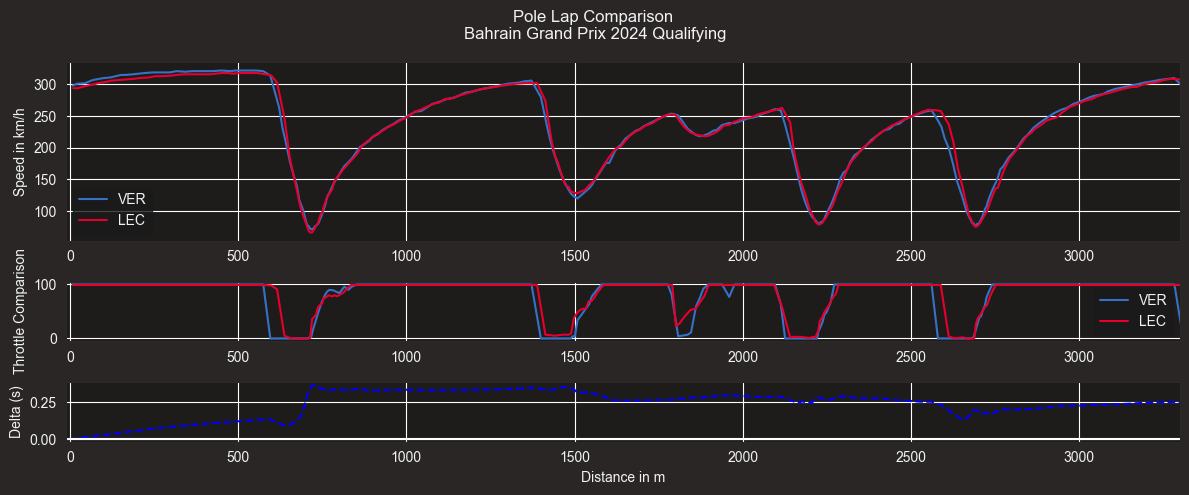

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Saudi Arabian Grand Prix (Round 2)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '14', '81', '4', '63', '44', '22', '18', '38', '23', '20', '3', '27', '77', '31', '10', '2', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Future

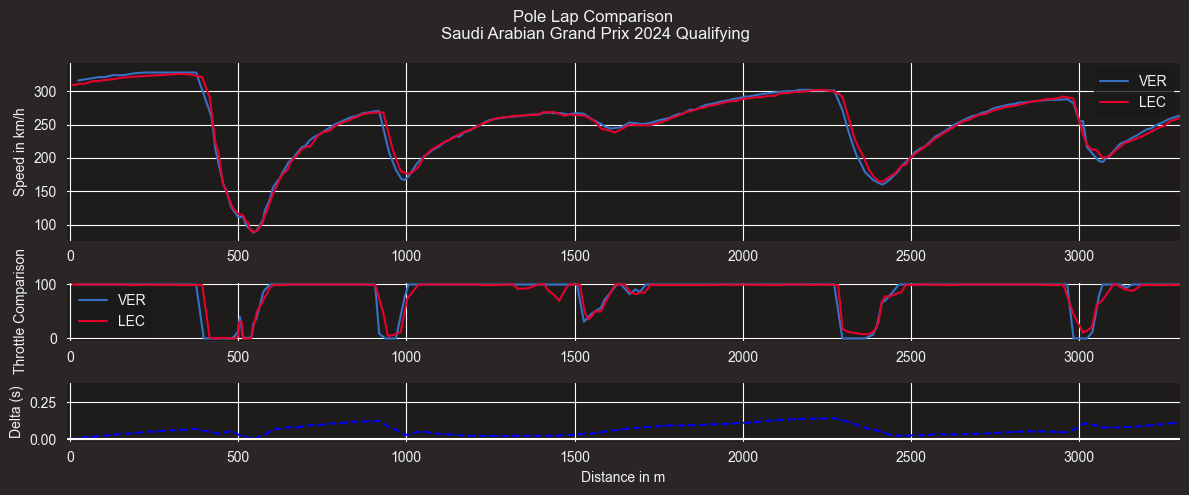

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Australian Grand Prix (Round 3)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['1', '55', '11', '4', '16', '81', '63', '22', '18', '14', '44', '23', '77', '20', '31', '27', '10', '3', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: FutureWarni

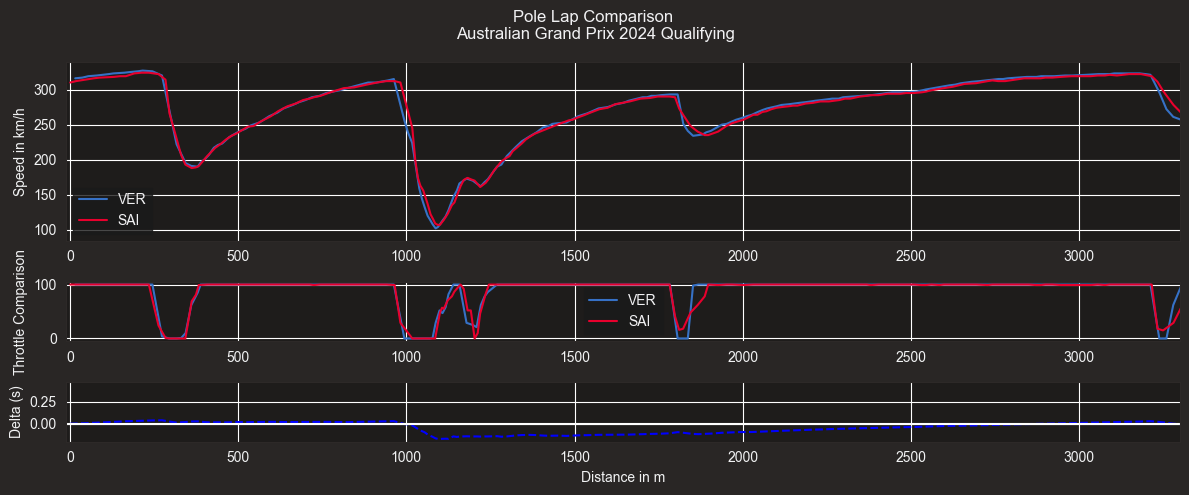

core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Japanese Grand Prix (Round 4)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '55', '14', '81', '44', '16', '63', '22', '3', '27', '77', '23', '31', '18', '10', '20', '2', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Future

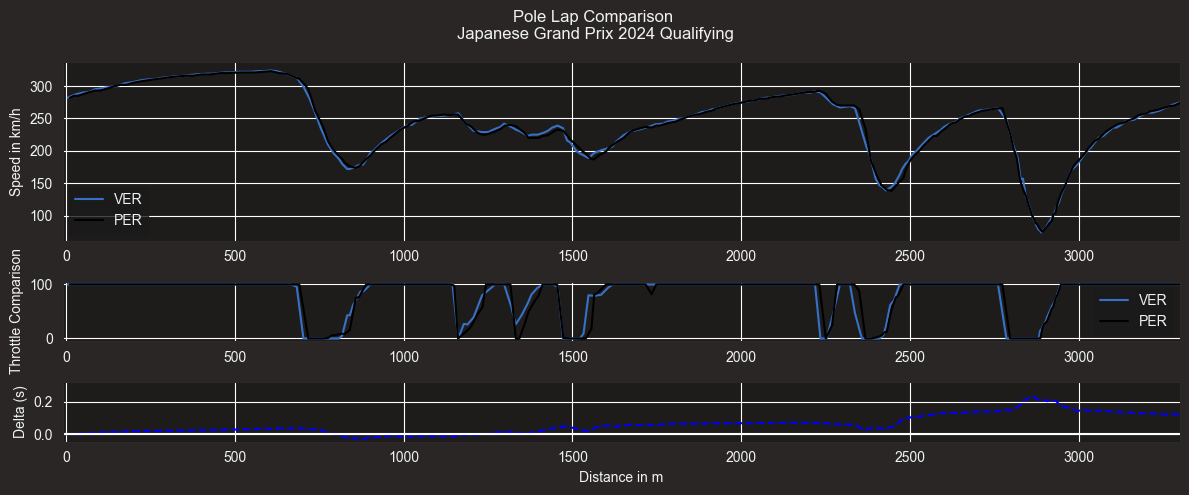

core           INFO 	Loading data for Chinese Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Chinese Grand Prix (Round 5)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '4', '81', '16', '55', '63', '27', '77', '18', '3', '31', '23', '10', '24', '20', '44', '22', '2']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Future

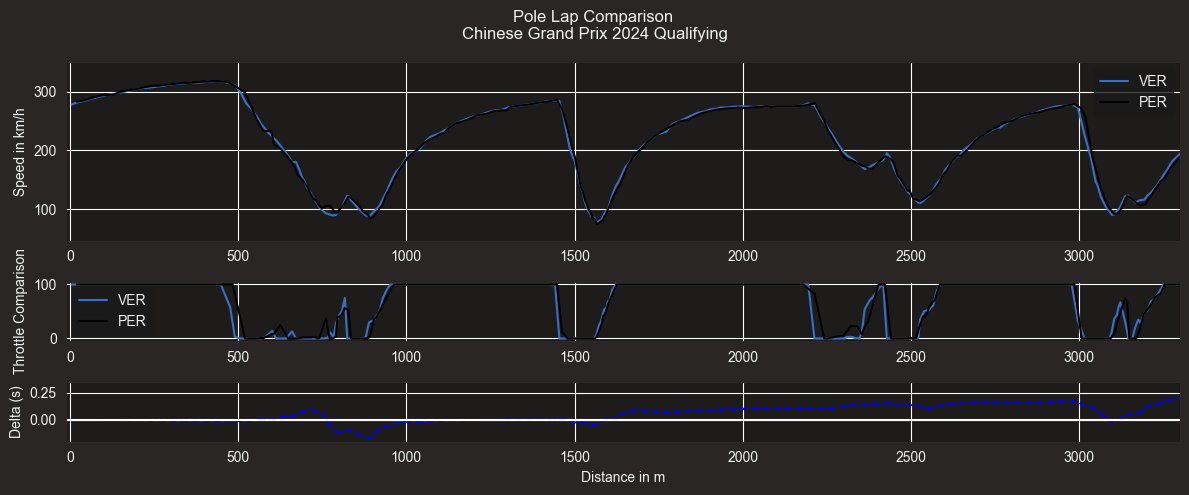

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Miami Grand Prix (Round 6)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '11', '4', '81', '63', '44', '27', '22', '18', '10', '31', '23', '14', '77', '2', '3', '20', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Future

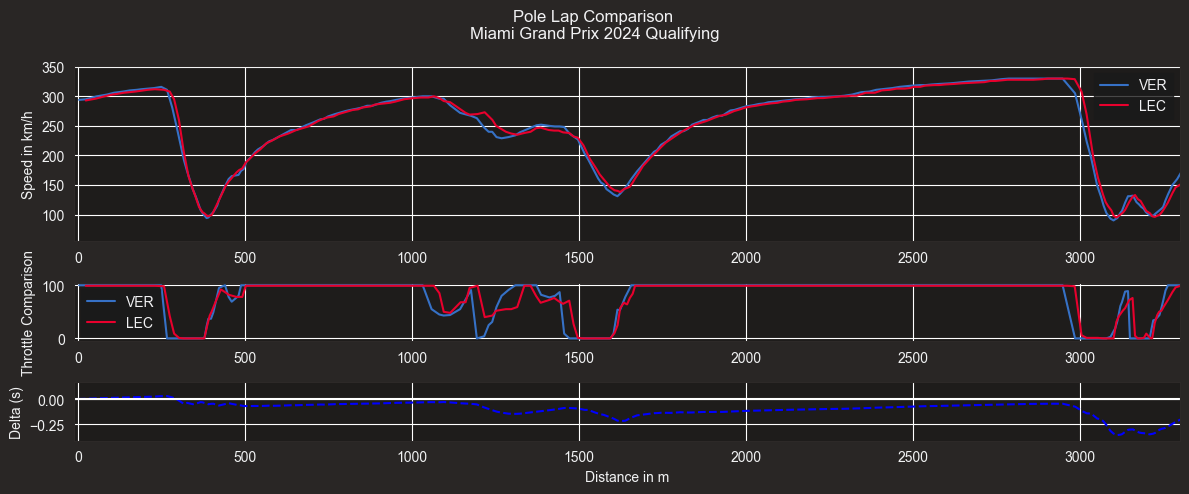

core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Emilia Romagna Grand Prix (Round 7)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  2: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '16', '55', '63', '22', '44', '3', '27', '11', '31', '18', '23', '10', '77', '24', '20', '14', '2']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Des

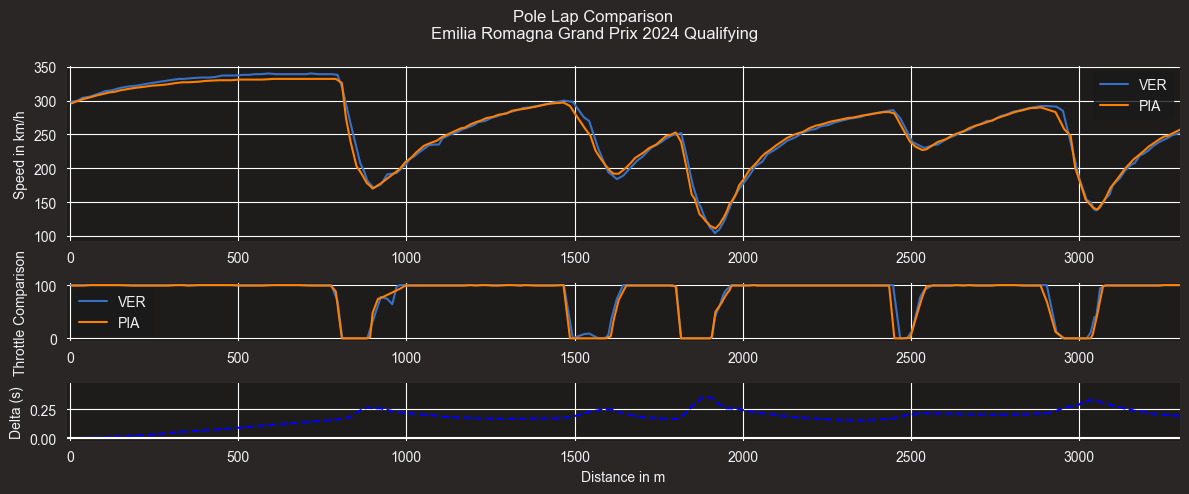

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Monaco Grand Prix (Round 8)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  3: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '31', '27', '3', '18', '20', '14', '2', '11', '77', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Des

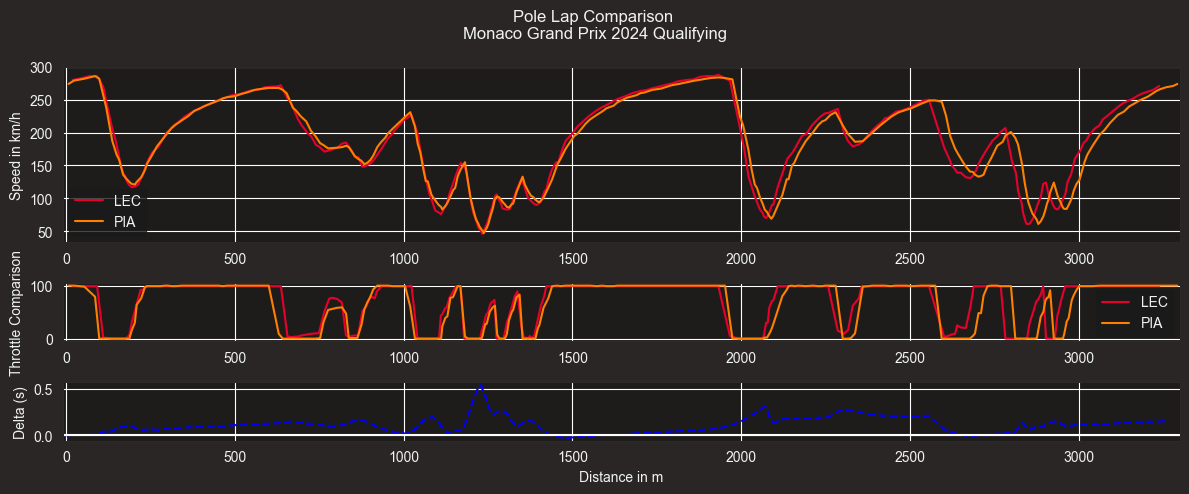

core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Canadian Grand Prix (Round 9)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '4', '81', '3', '14', '44', '22', '18', '23', '16', '55', '2', '20', '10', '11', '77', '31', '27', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Future

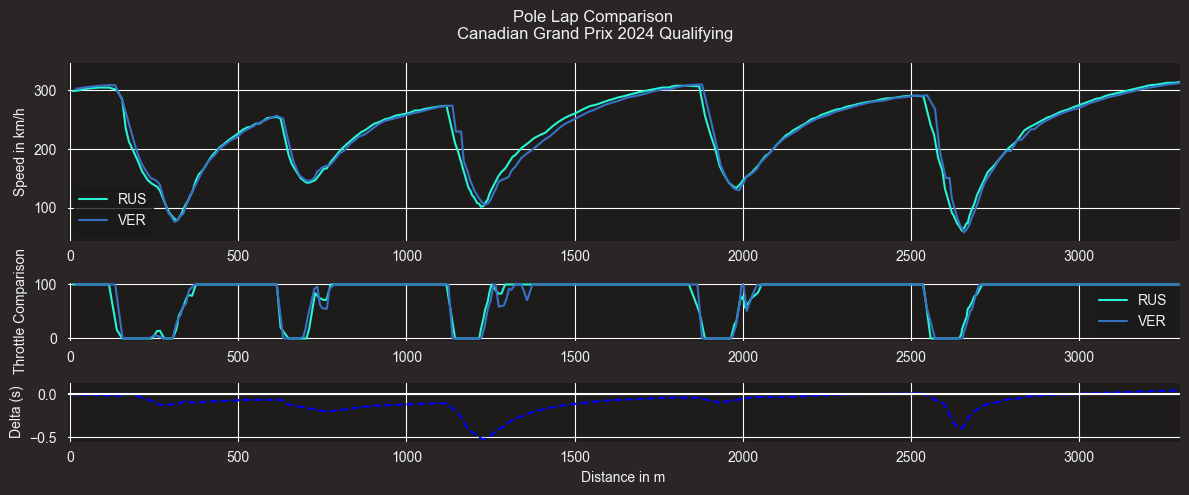

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Spanish Grand Prix (Round 10)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '44', '63', '16', '55', '10', '11', '31', '81', '14', '77', '27', '18', '24', '20', '22', '3', '23', '2']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Future

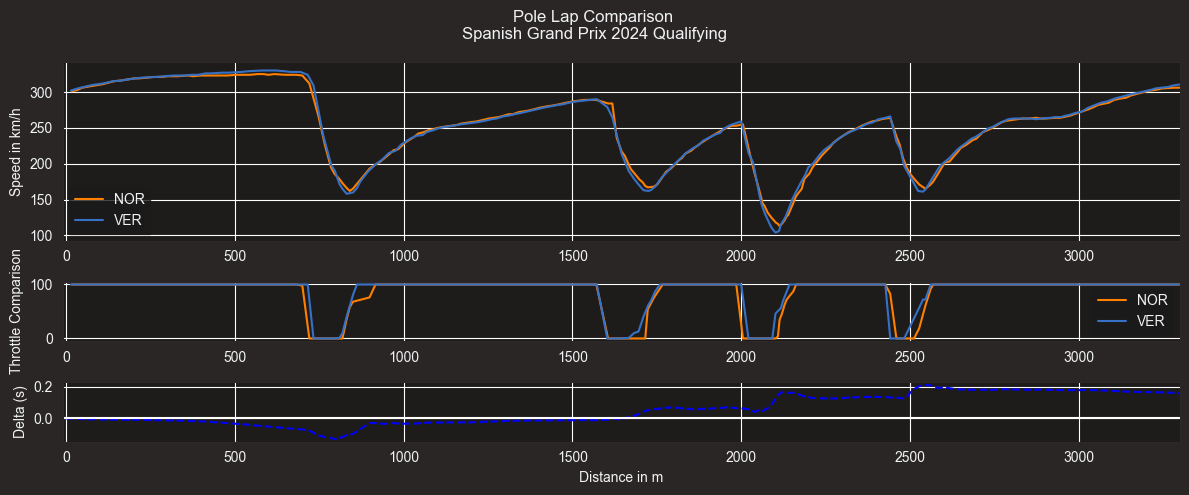

core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Austrian Grand Prix (Round 11)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '63', '55', '44', '16', '81', '11', '27', '31', '3', '20', '10', '22', '14', '23', '18', '77', '2', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Future

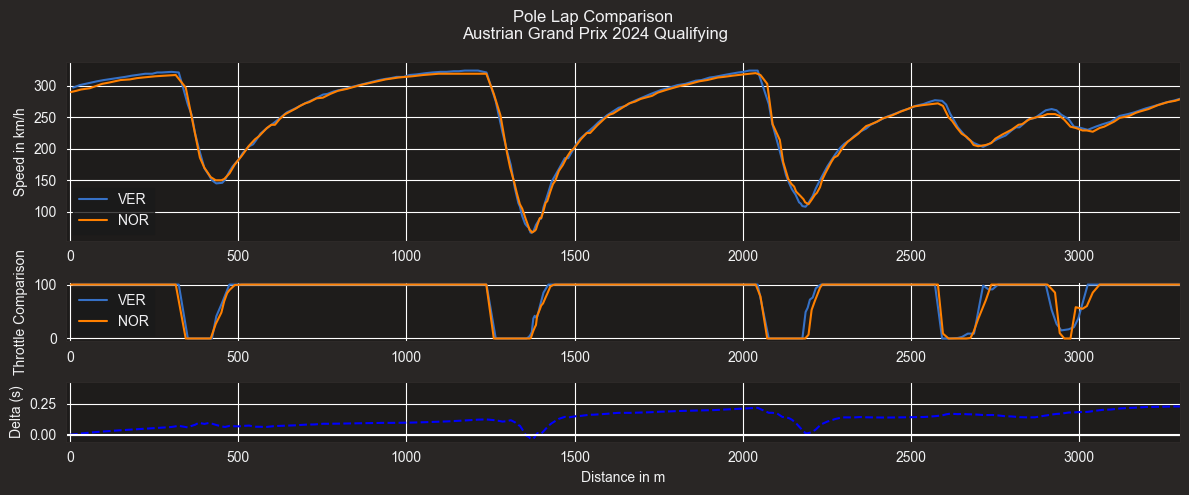

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing British Grand Prix (Round 12)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '44', '4', '1', '81', '27', '55', '18', '23', '14', '16', '2', '22', '24', '3', '77', '20', '31', '11', '10']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Future

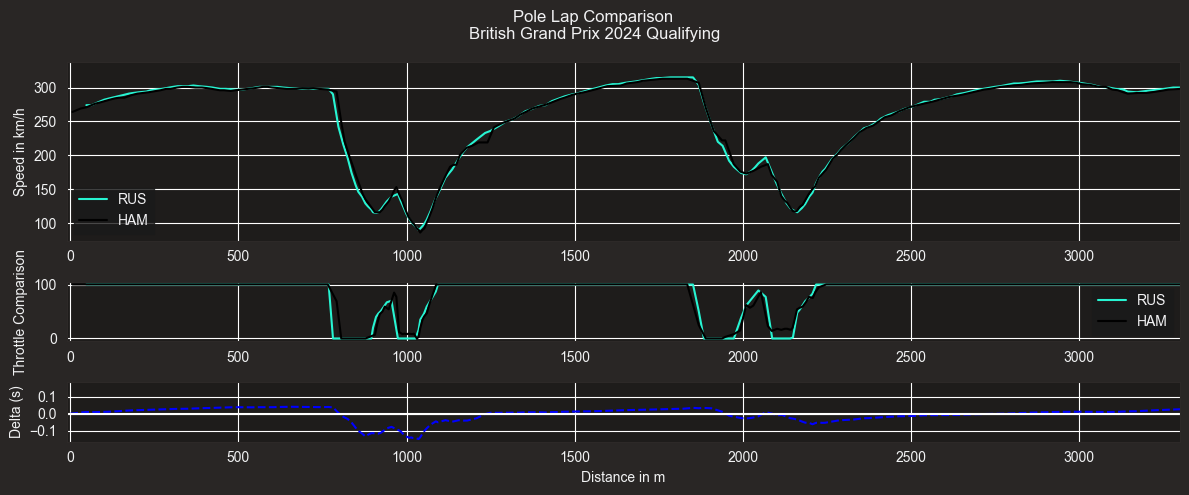

core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Hungarian Grand Prix (Round 13)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '1', '55', '44', '16', '14', '18', '3', '22', '27', '77', '23', '2', '20', '11', '63', '24', '31', '10']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Future

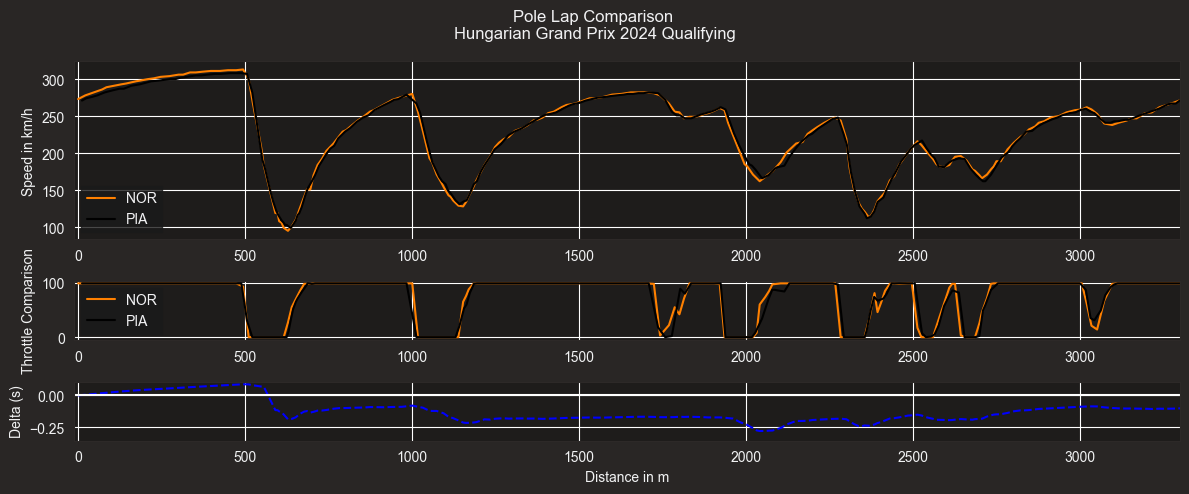

core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Belgian Grand Prix (Round 14)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '44', '4', '81', '63', '55', '14', '31', '23', '10', '3', '77', '18', '27', '20', '22', '2', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Future

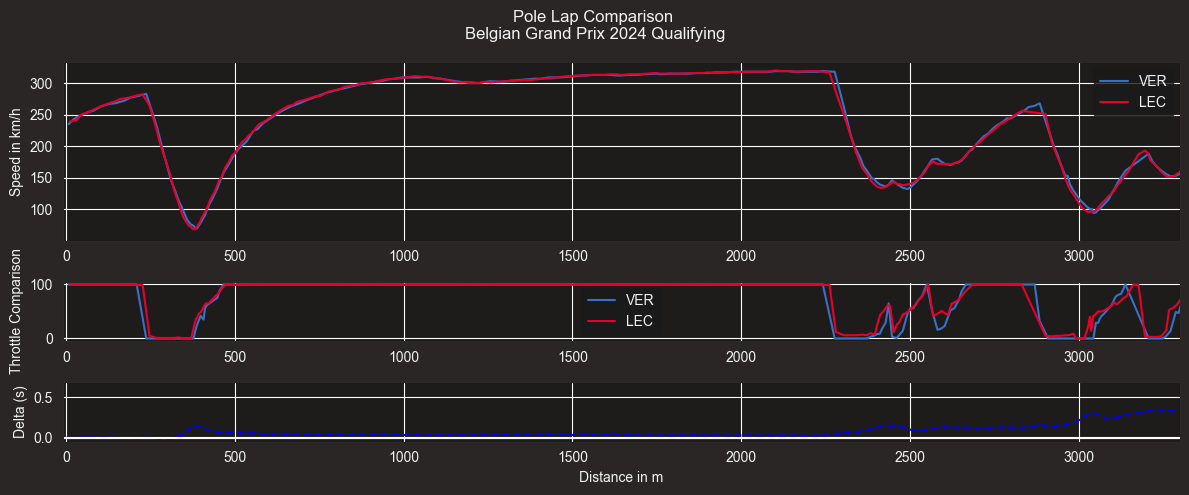

core           INFO 	Loading data for Dutch Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Dutch Grand Prix (Round 15)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 2
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 2)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '81', '63', '11', '16', '14', '18', '10', '55', '44', '22', '27', '20', '3', '31', '77', '24', '23', '2']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be remove

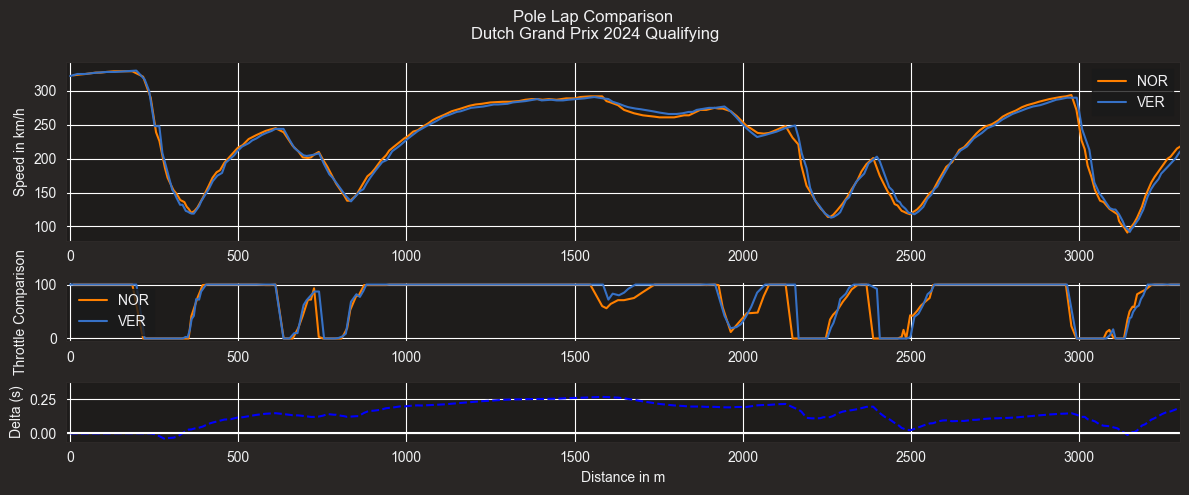

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Italian Grand Prix (Round 16)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '63', '16', '55', '44', '1', '11', '23', '27', '14', '3', '20', '10', '31', '22', '18', '43', '77', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Futur

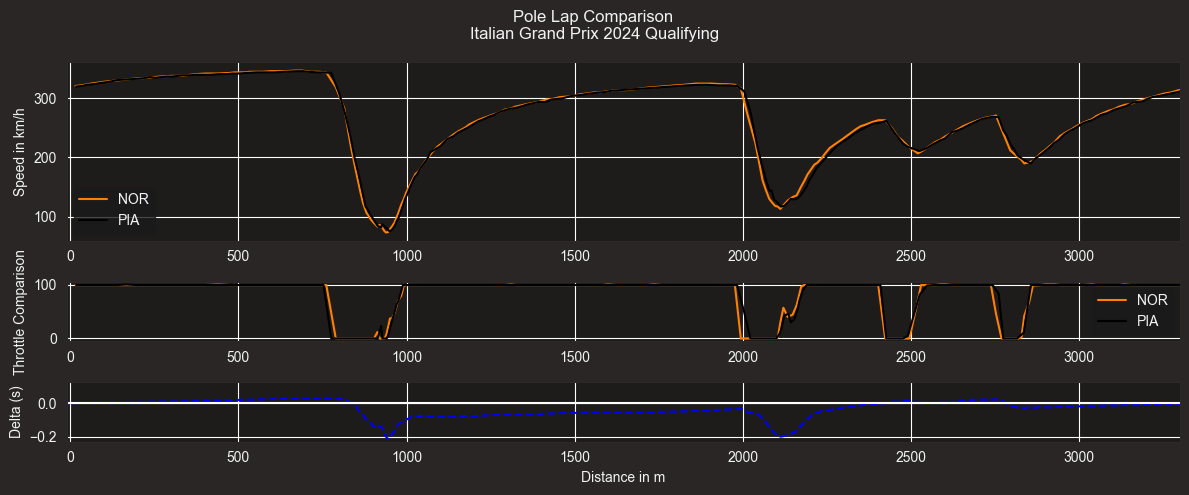

core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Azerbaijan Grand Prix (Round 17)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '11', '63', '1', '44', '14', '43', '23', '50', '22', '27', '18', '3', '4', '77', '24', '31', '10']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Futur

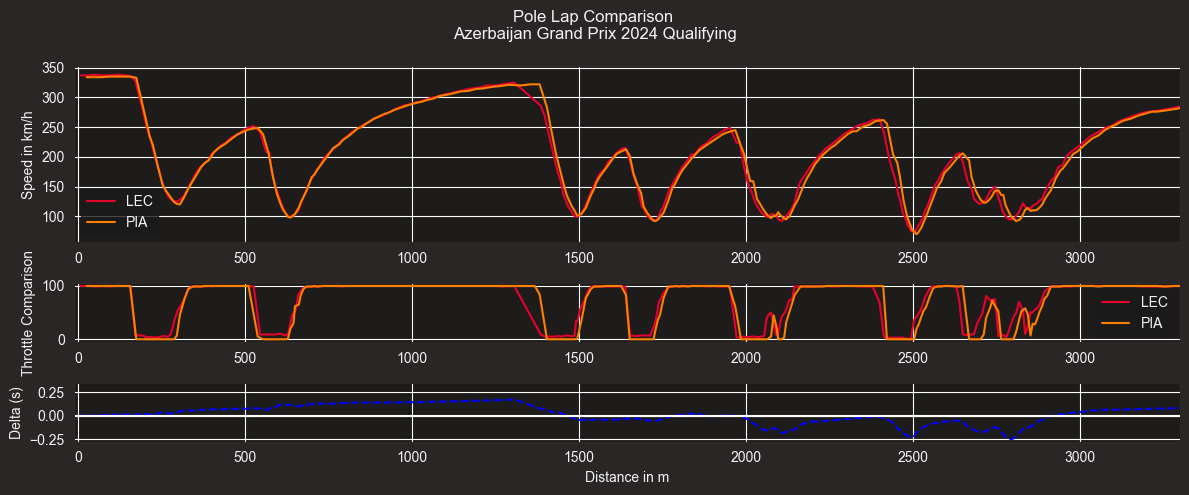

core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Singapore Grand Prix (Round 18)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '44', '63', '81', '27', '14', '22', '16', '55', '23', '43', '11', '20', '31', '3', '18', '10', '77', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Futur

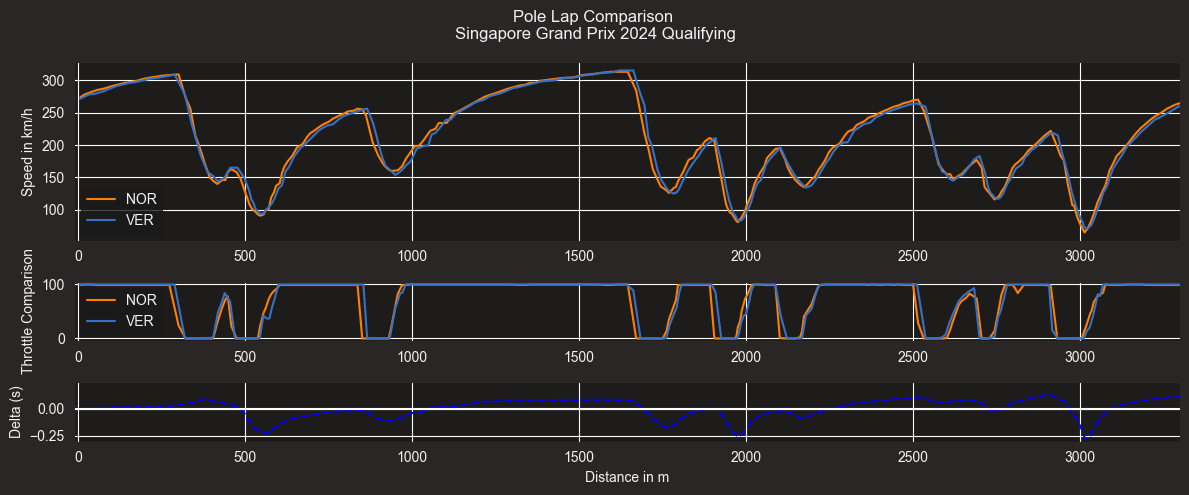

core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing United States Grand Prix (Round 19)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '55', '16', '81', '63', '10', '14', '20', '11', '22', '27', '31', '18', '30', '23', '43', '77', '44', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Futu

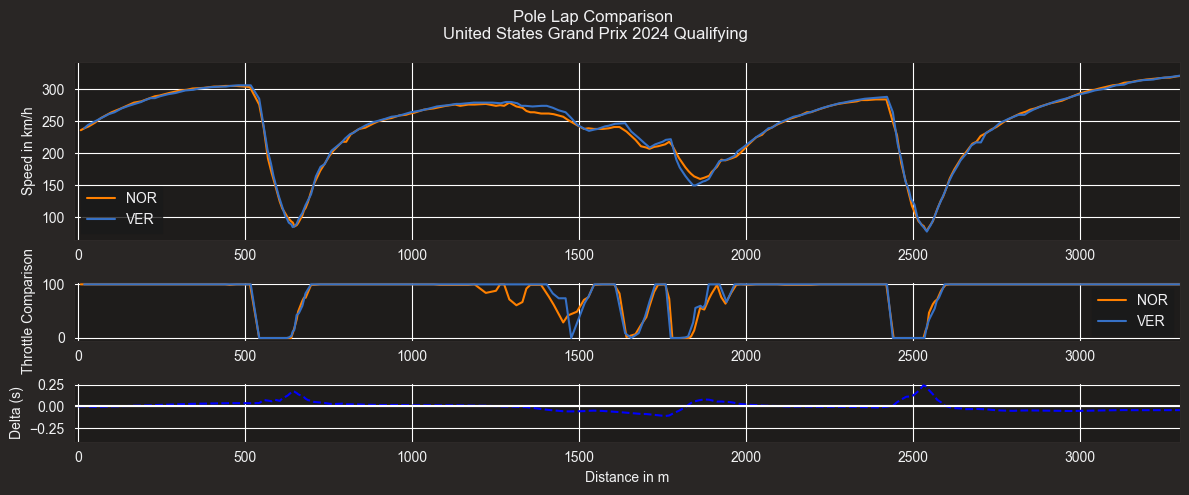

core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v3.4.4]


Processing Mexico City Grand Prix (Round 20)


req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '4', '16', '63', '44', '20', '10', '23', '27', '22', '30', '14', '18', '77', '43', '81', '11', '31', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_dr

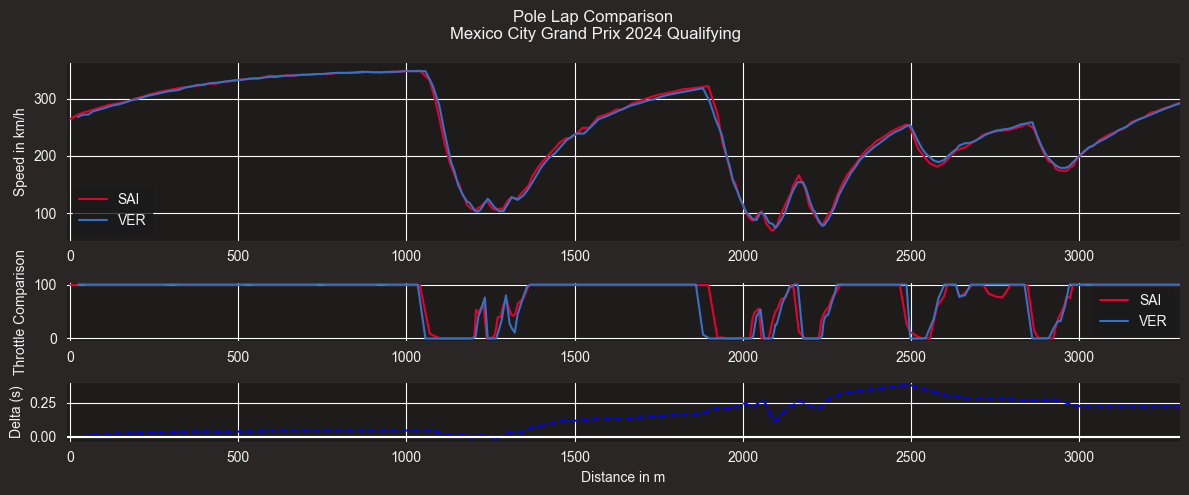

core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing São Paulo Grand Prix (Round 21)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '63', '22', '31', '30', '16', '23', '81', '14', '18', '77', '1', '11', '55', '10', '44', '50', '43', '27', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Futu

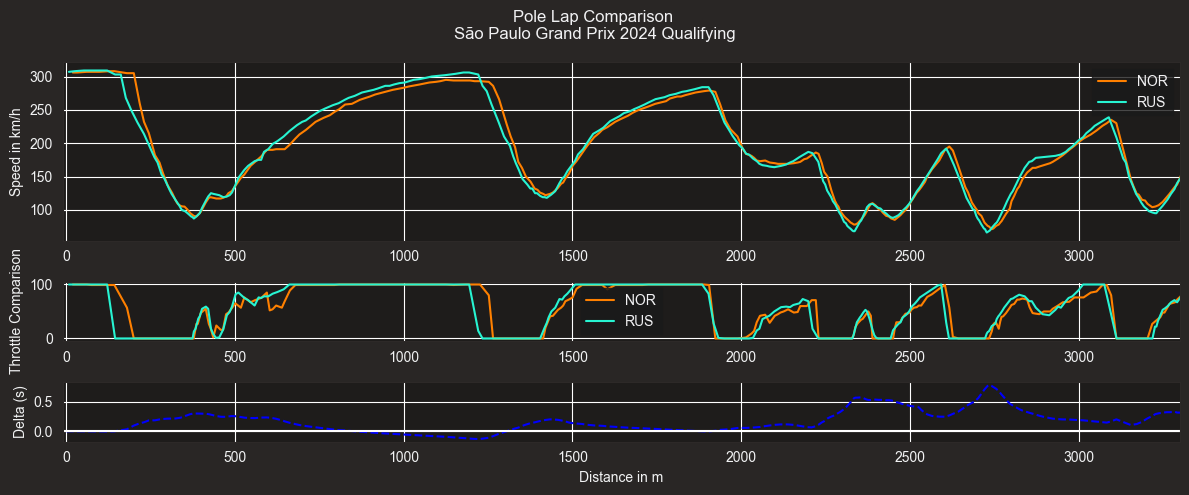

core           INFO 	Loading data for Las Vegas Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Las Vegas Grand Prix (Round 22)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '55', '10', '16', '1', '4', '22', '81', '27', '44', '31', '20', '24', '43', '30', '11', '14', '23', '77', '18']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Futu

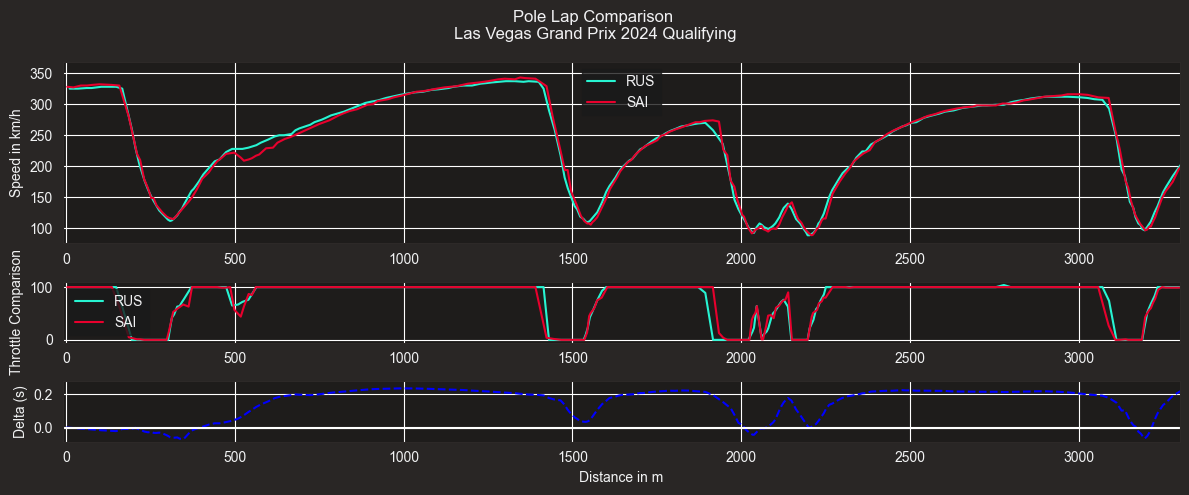

core           INFO 	Loading data for Qatar Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Qatar Grand Prix (Round 23)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '4', '81', '16', '44', '55', '14', '11', '20', '10', '24', '77', '22', '18', '23', '30', '27', '43', '31']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Futu

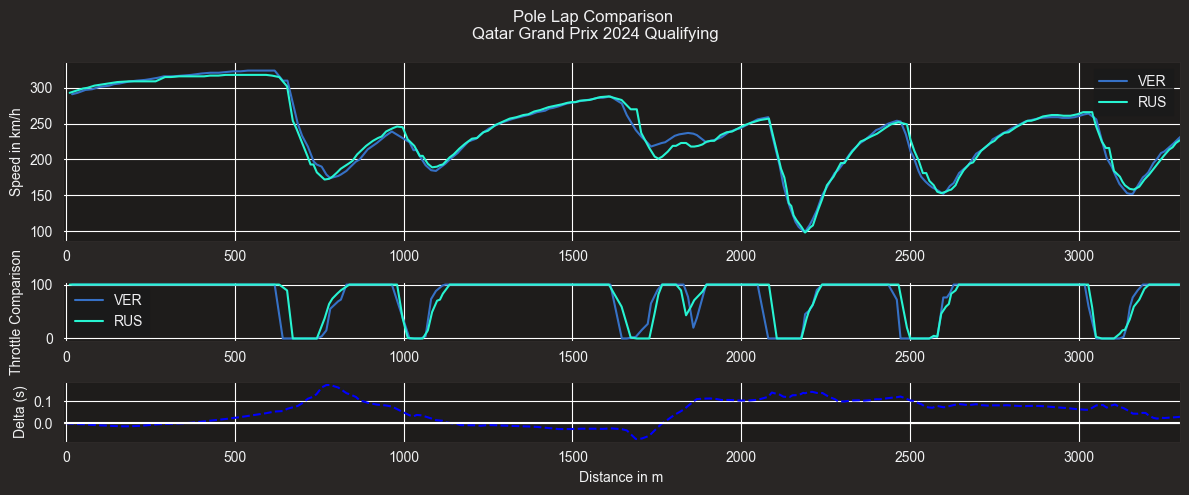

core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Processing Abu Dhabi Grand Prix (Round 24)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '55', '27', '1', '10', '63', '14', '77', '11', '22', '30', '18', '16', '20', '23', '24', '44', '43', '61']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\utils.py:89: Futu

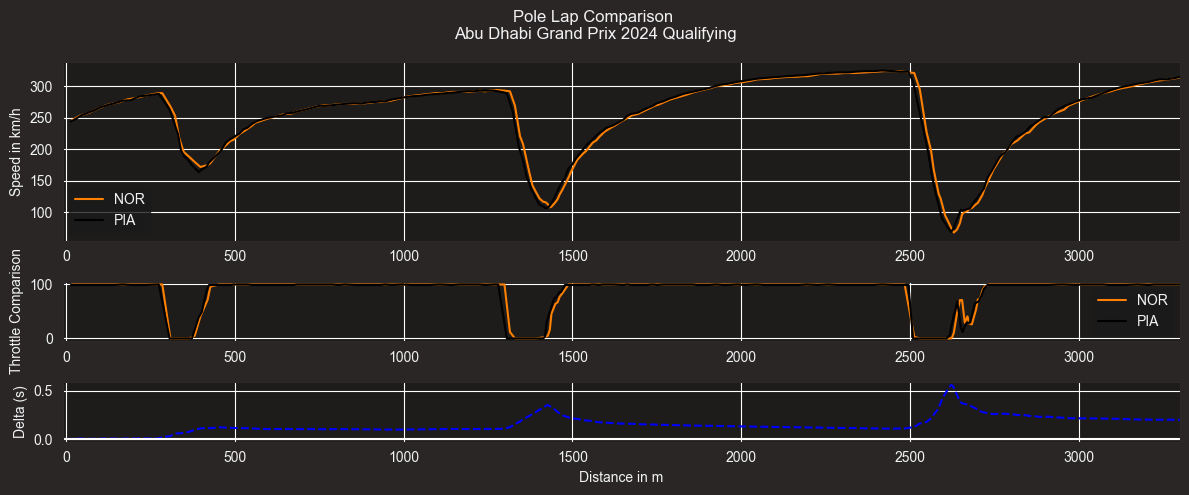

In [115]:
import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fastf1.Cache.enable_cache('cache')  # Ensure caching is disabled if needed

# Custom team colors
team_colors = {
    'Red Bull Racing': '#3671C6',
    'Ferrari': '#E8002D',
    'Mercedes': '#27F4D2',
    'McLaren': '#FF8000',
    'Aston Martin': '#229971',
    'Alpine': '#FF87BC',
    'Kick Sauber': '#52E252',
    'Haas F1 Team': '#B6BABD',
    'RB': '#6692FF',
    'Williams': '#64C4FF'
}

# Load 2024 schedule
schedule = fastf1.get_event_schedule(2024)

# Loop through each round
for round_number in schedule['RoundNumber']:
    try:
        event_name = schedule.loc[schedule['RoundNumber'] == round_number, 'EventName'].values[0]
        print(f"Processing {event_name} (Round {round_number})")

        # Fetch session data
        session_q = fastf1.get_session(2024, round_number, 'Q')
        session_q.load()

        # Validate session data
        if session_q.results is None or session_q.laps is None:
            print(f"Skipping {event_name} (Round {round_number}) due to missing data.")
            continue

        results = session_q.results

        # Get top 2 drivers based on Q3 time
        top_2_drivers = results.nsmallest(2, 'Position')[['Abbreviation', 'Q3']].dropna().values.tolist()
        if len(top_2_drivers) < 2:
            print(f"Not enough data found for {event_name} (Round {round_number}). Skipping...")
            continue

        driver1, driver1_q3_time = top_2_drivers[0]
        driver2, driver2_q3_time = top_2_drivers[1]

        # Get team names for the drivers
        driver1_team = results.loc[results['Abbreviation'] == driver1, 'TeamName'].values[0]
        driver2_team = results.loc[results['Abbreviation'] == driver2, 'TeamName'].values[0]

        # Get team colors
        driver1_color = team_colors.get(driver1_team, 'black')
        driver2_color = 'black' if driver1_team == driver2_team else team_colors.get(driver2_team, 'black')

        # Get the fastest lap for each driver
        driver1_lap = session_q.laps.pick_driver(driver1)[session_q.laps.pick_driver(driver1)['LapTime'] == driver1_q3_time].iloc[0]
        driver2_lap = session_q.laps.pick_driver(driver2)[session_q.laps.pick_driver(driver2)['LapTime'] == driver2_q3_time].iloc[0]

        # Get telemetry data
        driver1_tel = driver1_lap.get_car_data().add_distance()
        driver2_tel = driver2_lap.get_car_data().add_distance()

        # Create a subplot with 3 plots
        fig, ax = plt.subplots(3, 1, gridspec_kw={'height_ratios': [3, 1, 1]}, figsize=(12, 5))
        plt.suptitle(f"Pole Lap Comparison \n{event_name} {session_q.event.year} Qualifying")

        # Plot 1: Speed comparison
        ax[0].plot(driver1_tel['Distance'], driver1_tel['Speed'], color=driver1_color, label=driver1)
        ax[0].plot(driver2_tel['Distance'], driver2_tel['Speed'], color=driver2_color, label=driver2)
        ax[0].set_ylabel('Speed in km/h')
        ax[0].legend()

        # Plot 2: Throttle comparison
        ax[1].plot(driver1_tel['Distance'], driver1_tel['Throttle'], color=driver1_color, label=driver1)
        ax[1].plot(driver2_tel['Distance'], driver2_tel['Throttle'], color=driver2_color, label=driver2)
        ax[1].set_ylabel('Throttle Comparison')
        ax[1].legend()

        # Get delta time between drivers
        delta_time, ref_tel, compare_tel = fastf1.utils.delta_time(driver1_lap, driver2_lap)

        # Plot 3: Delta time comparison
        ax[2].plot(ref_tel['Distance'], delta_time, 'b--')
        ax[2].axhline(0, color='white')
        ax[2].set_ylabel('Delta (s)')

        # Set figure layout
        ax[2].set_xlabel('Distance in m')
        ax[0].set_xlim([-10.5, 3300])
        ax[1].set_xlim([-10.5, 3300])
        ax[2].set_xlim([-10.5, 3300])
        plt.tight_layout()

        # Show the plots
        plt.show()

    except Exception as e:
        print(f"Error processing {event_name} (Round {round_number}): {e}")


# Sector Wise Comparisions for Pole Lap in each round

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/1/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desktop\

Processing Pre-Season Testing (Round 0)
Error processing Pre-Season Testing (Round 0): Cannot get testing event by round number!
Processing Bahrain Grand Prix (Round 1)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '11', '14', '4', '81', '44', '27', '22', '18', '23', '3', '20', '77', '24', '2', '31', '10']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



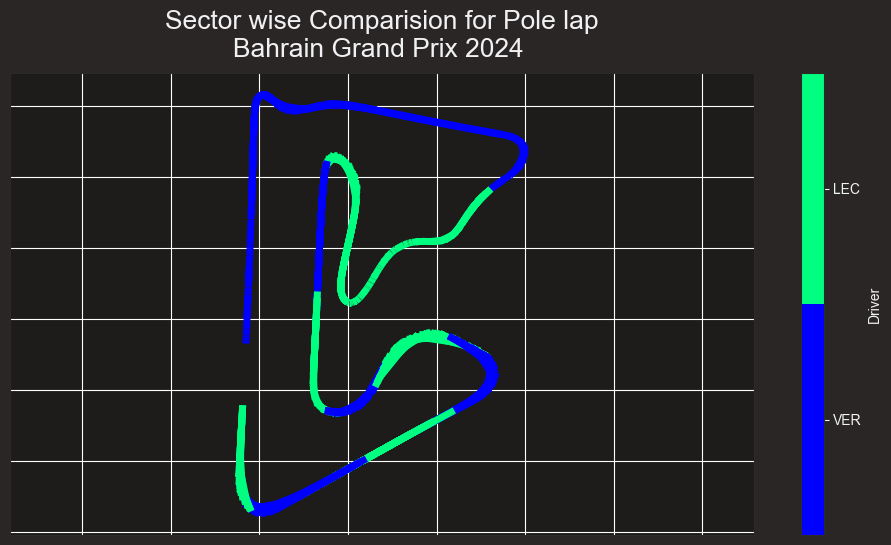

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/2/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\De

Processing Saudi Arabian Grand Prix (Round 2)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '14', '81', '4', '63', '44', '22', '18', '38', '23', '20', '3', '27', '77', '31', '10', '2', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



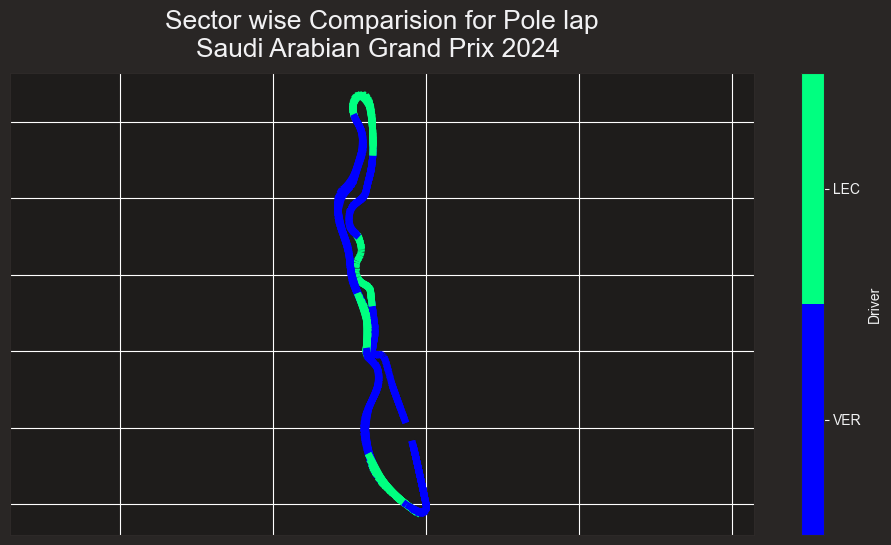

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/3/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Deskt

Processing Australian Grand Prix (Round 3)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['1', '55', '11', '4', '16', '81', '63', '22', '18', '14', '44', '23', '77', '20', '31', '27', '10', '3', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



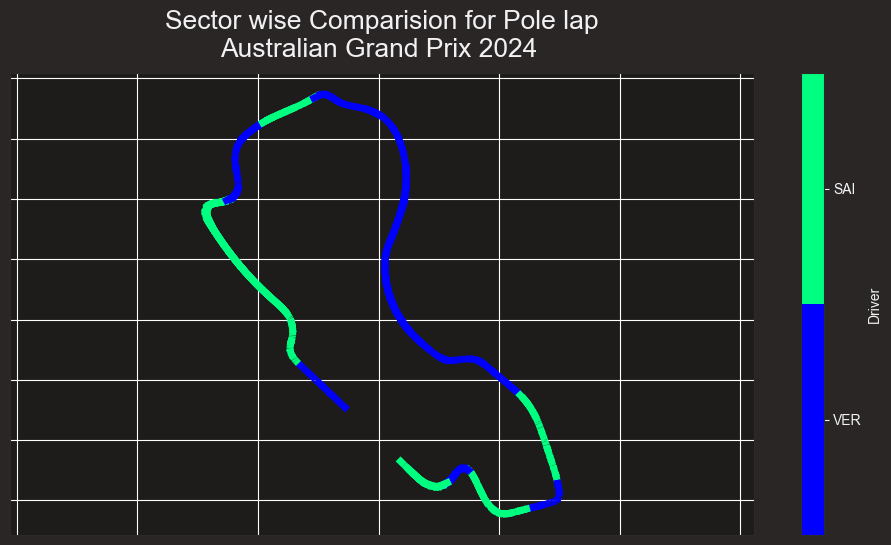

core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/4/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desktop

Processing Japanese Grand Prix (Round 4)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '55', '14', '81', '44', '16', '63', '22', '3', '27', '77', '23', '31', '18', '10', '20', '2', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



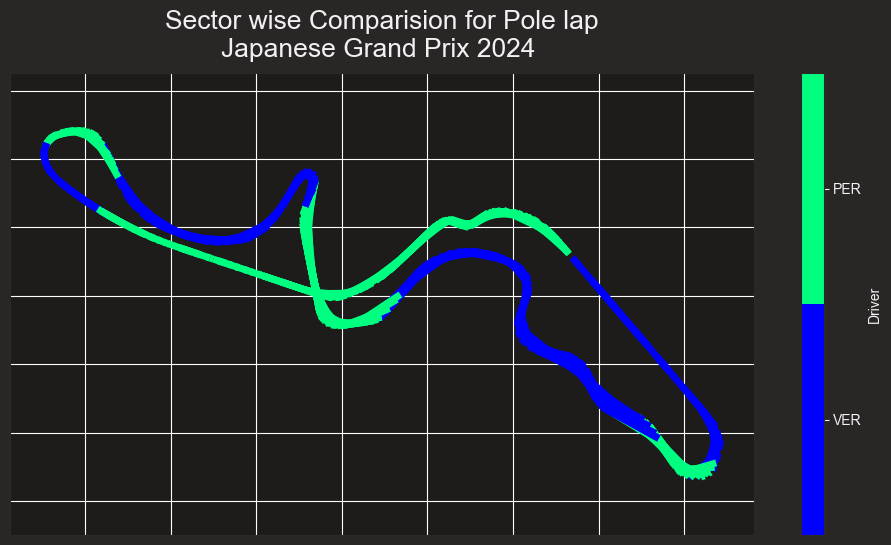

core           INFO 	Loading data for Chinese Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/5/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desktop\

Processing Chinese Grand Prix (Round 5)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '4', '81', '16', '55', '63', '27', '77', '18', '3', '31', '23', '10', '24', '20', '44', '22', '2']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



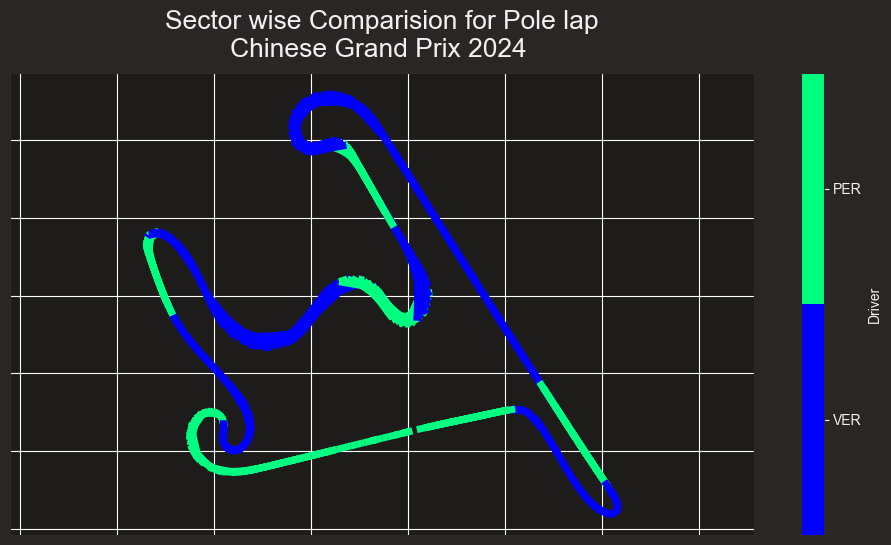

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/6/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desktop\F1

Processing Miami Grand Prix (Round 6)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '11', '4', '81', '63', '44', '27', '22', '18', '10', '31', '23', '14', '77', '2', '3', '20', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



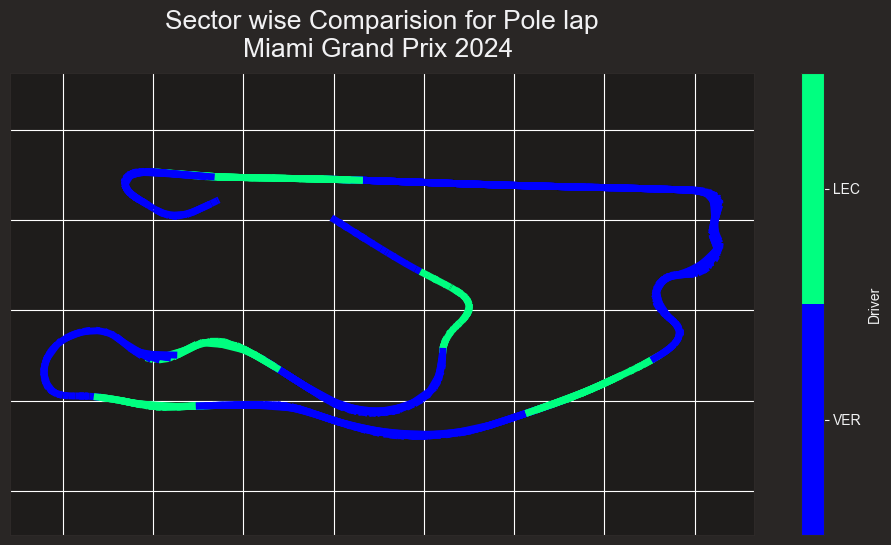

core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/7/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\D

Processing Emilia Romagna Grand Prix (Round 7)


core        WARNING 	Driver  2: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '16', '55', '63', '22', '44', '3', '27', '11', '31', '18', '23', '10', '77', '24', '20', '14', '2']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



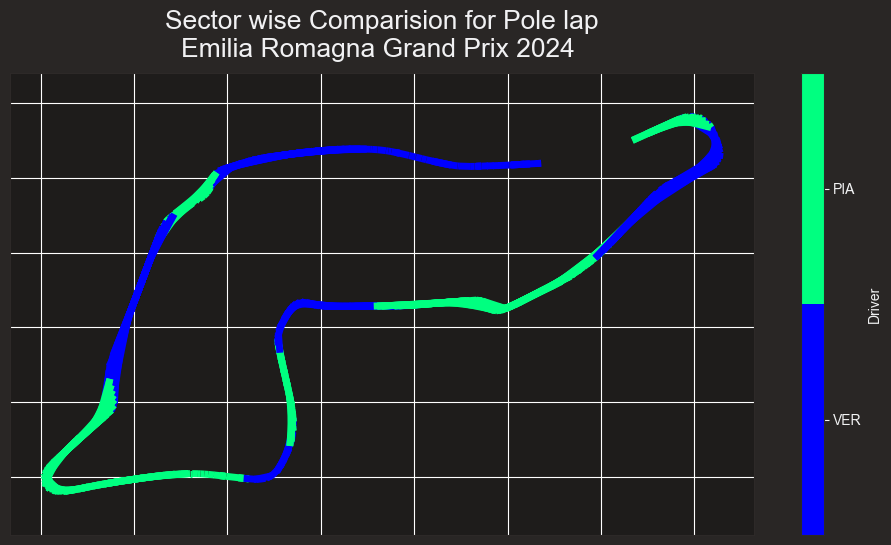

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/8/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desktop\F

Processing Monaco Grand Prix (Round 8)


core        WARNING 	Driver  3: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '31', '27', '3', '18', '20', '14', '2', '11', '77', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



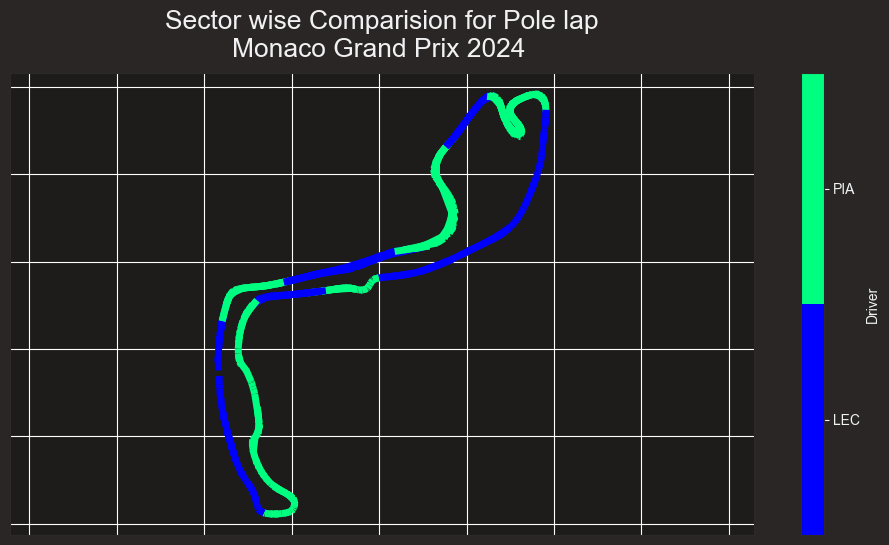

core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/9/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desktop

Processing Canadian Grand Prix (Round 9)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '4', '81', '3', '14', '44', '22', '18', '23', '16', '55', '2', '20', '10', '11', '77', '31', '27', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



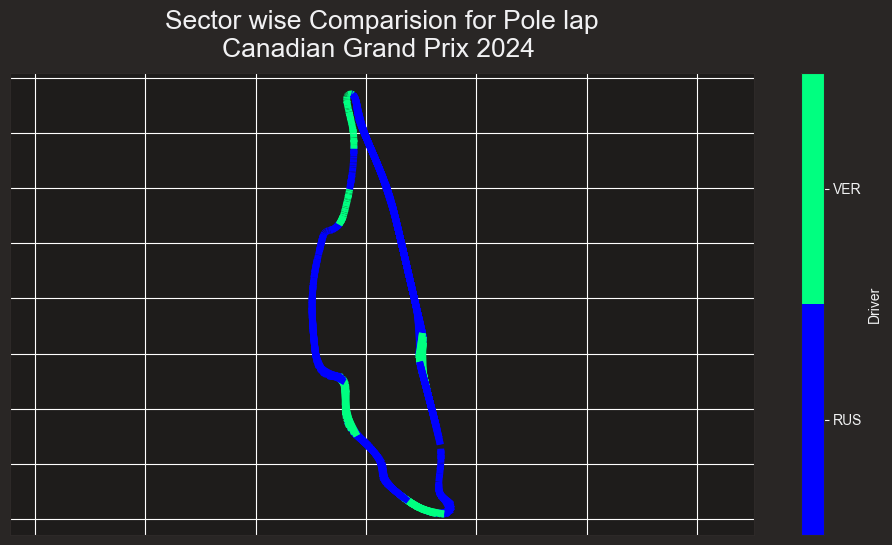

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/10/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desktop

Processing Spanish Grand Prix (Round 10)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '44', '63', '16', '55', '10', '11', '31', '81', '14', '77', '27', '18', '24', '20', '22', '3', '23', '2']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



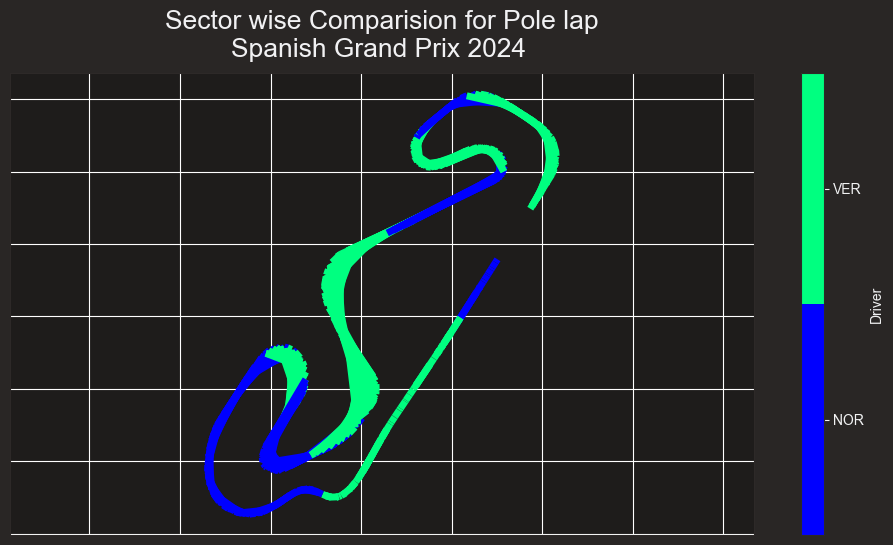

core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/11/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Deskto

Processing Austrian Grand Prix (Round 11)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '63', '55', '44', '16', '81', '11', '27', '31', '3', '20', '10', '22', '14', '23', '18', '77', '2', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



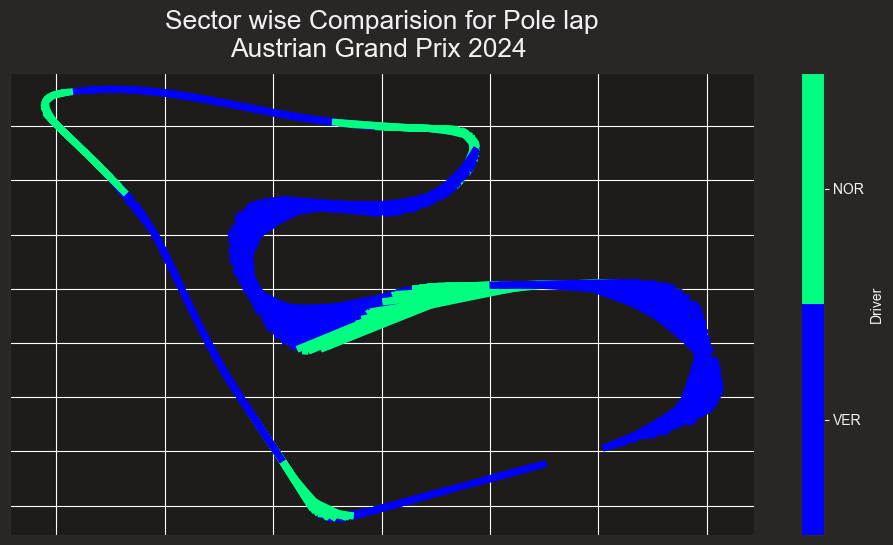

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/12/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desktop

Processing British Grand Prix (Round 12)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '44', '4', '1', '81', '27', '55', '18', '23', '14', '16', '2', '22', '24', '3', '77', '20', '31', '11', '10']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



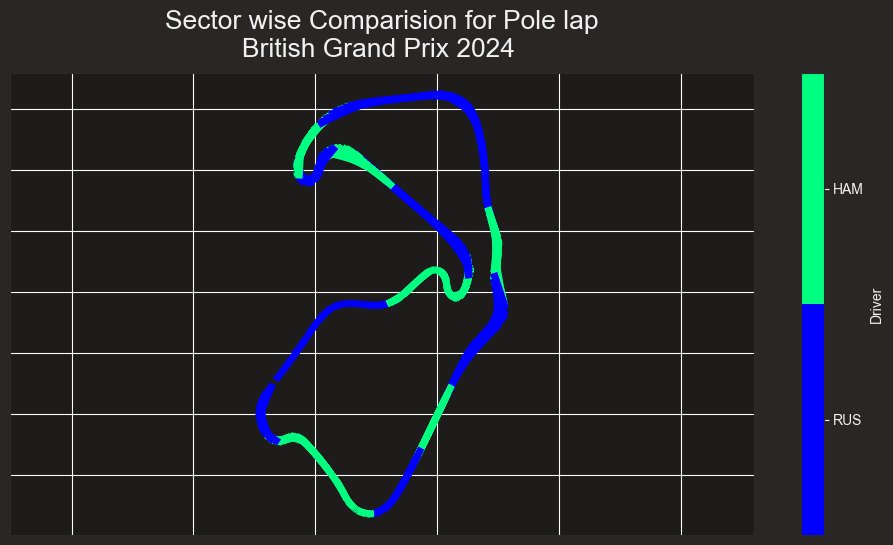

core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/13/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Deskt

Processing Hungarian Grand Prix (Round 13)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '1', '55', '44', '16', '14', '18', '3', '22', '27', '77', '23', '2', '20', '11', '63', '24', '31', '10']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



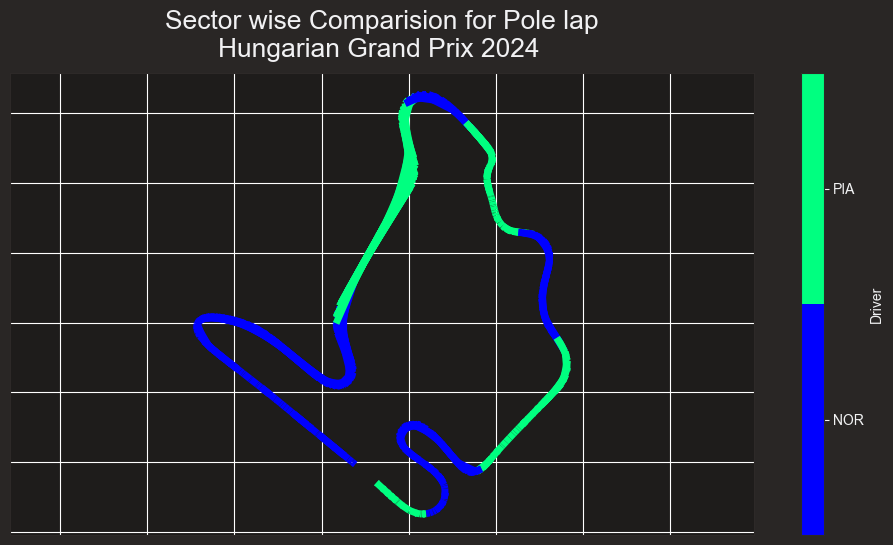

core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/14/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desktop

Processing Belgian Grand Prix (Round 14)


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '44', '4', '81', '63', '55', '14', '31', '23', '10', '3', '77', '18', '27', '20', '22', '2', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: Futur

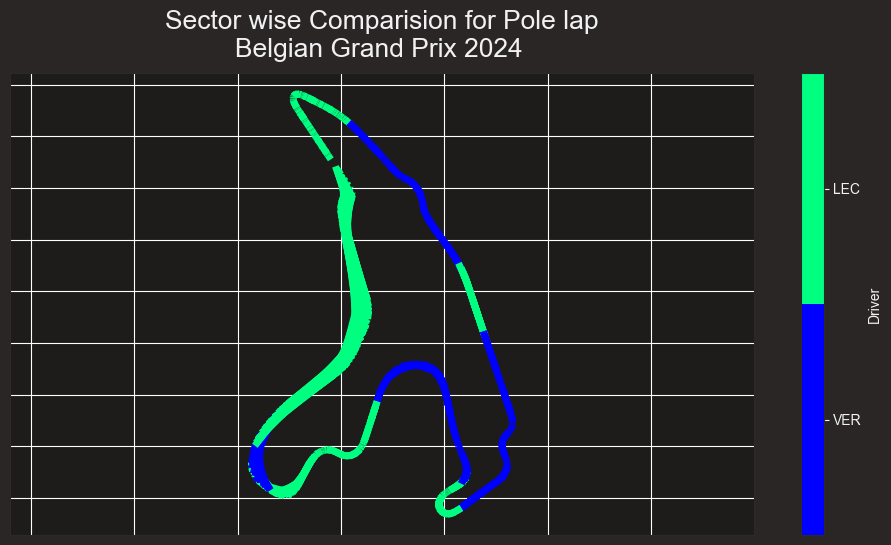

core           INFO 	Loading data for Dutch Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/15/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desktop\F

Processing Dutch Grand Prix (Round 15)


core        WARNING 	No lap data for driver 2
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 2)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '81', '63', '11', '16', '14', '18', '10', '55', '44', '22', '27', '20', '3', '31', '77', '24', '23', '2']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



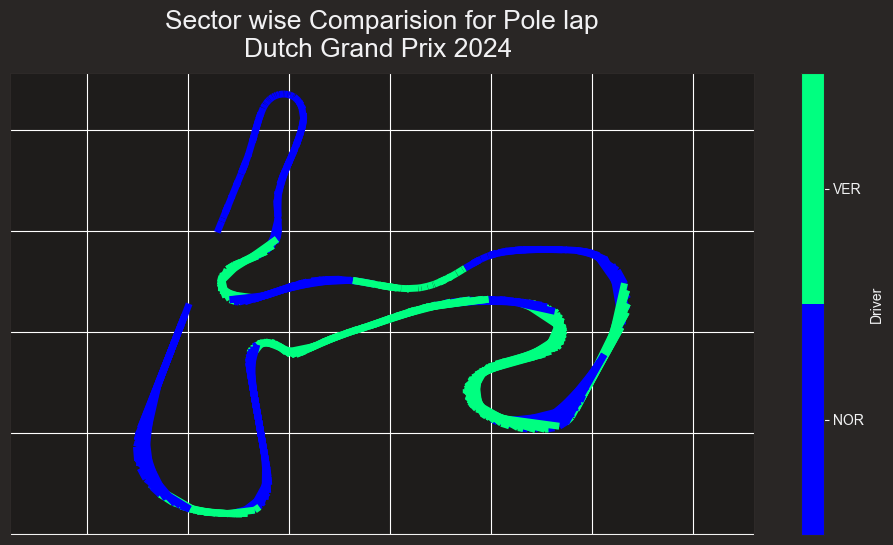

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/16/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desktop

Processing Italian Grand Prix (Round 16)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '63', '16', '55', '44', '1', '11', '23', '27', '14', '3', '20', '10', '31', '22', '18', '43', '77', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



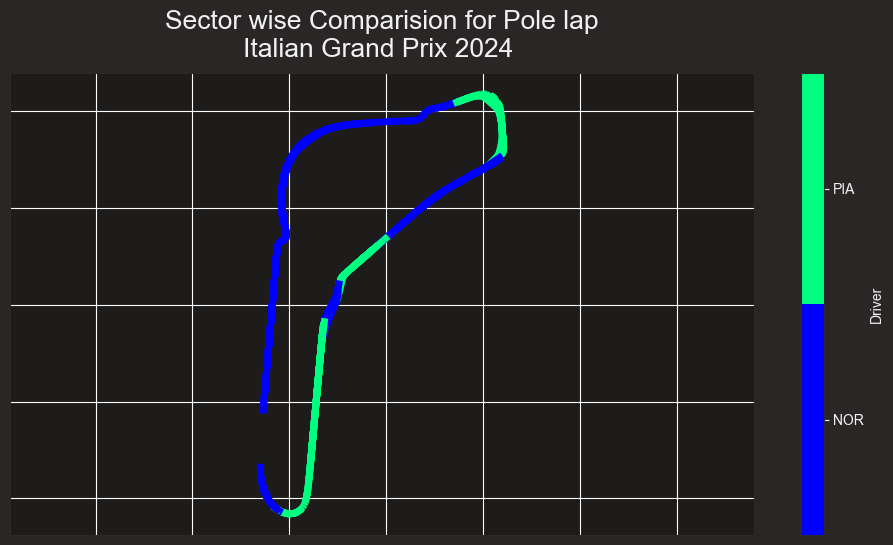

core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/17/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desk

Processing Azerbaijan Grand Prix (Round 17)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '11', '63', '1', '44', '14', '43', '23', '50', '22', '27', '18', '3', '4', '77', '24', '31', '10']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



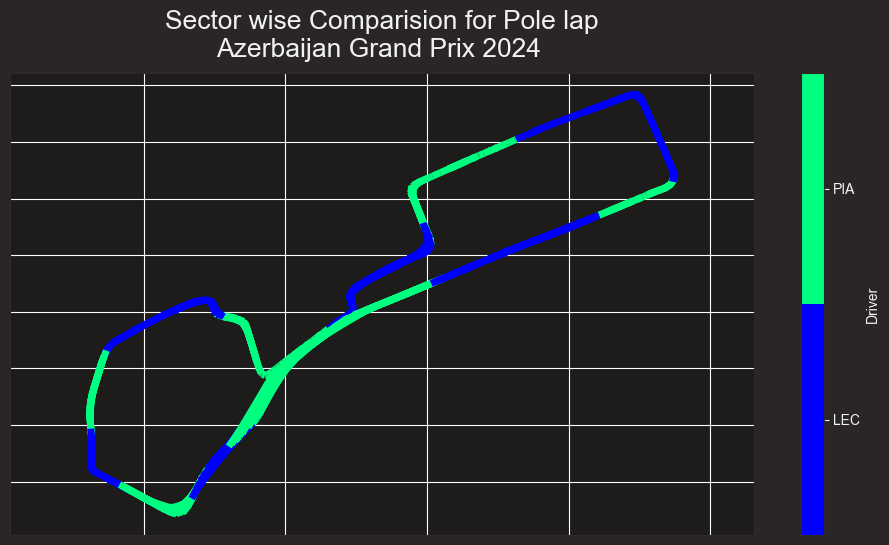

core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/18/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Deskt

Processing Singapore Grand Prix (Round 18)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '44', '63', '81', '27', '14', '22', '16', '55', '23', '43', '11', '20', '31', '3', '18', '10', '77', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



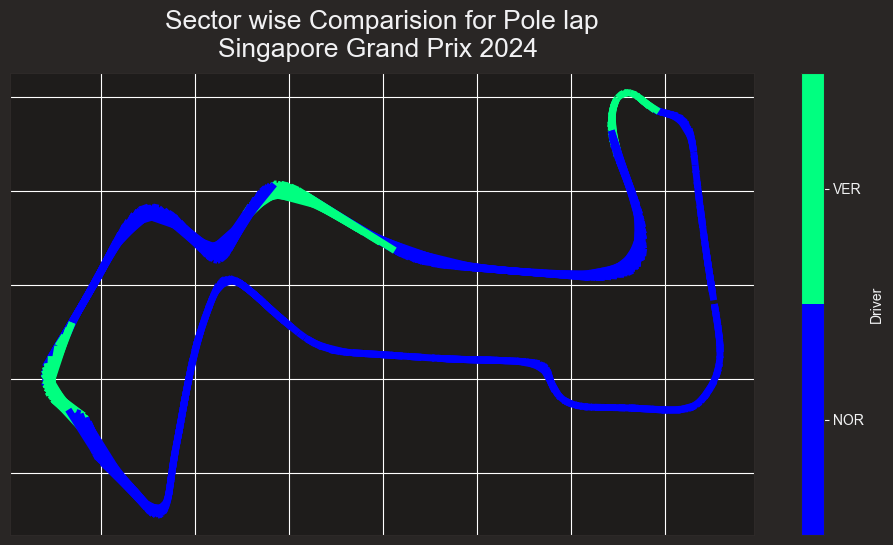

core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/19/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\D

Processing United States Grand Prix (Round 19)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '55', '16', '81', '63', '10', '14', '20', '11', '22', '27', '31', '18', '30', '23', '43', '77', '44', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



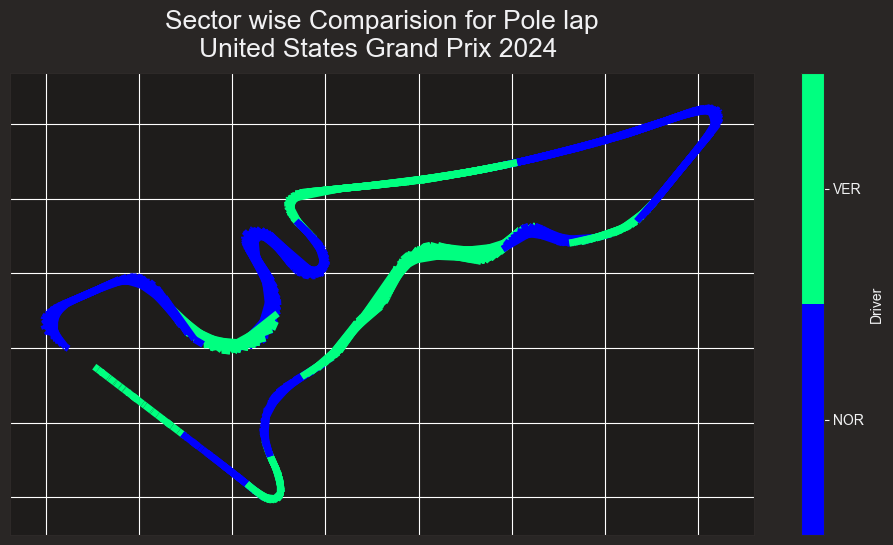

core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/20/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Des

Processing Mexico City Grand Prix (Round 20)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '4', '16', '63', '44', '20', '10', '23', '27', '22', '30', '14', '18', '77', '43', '81', '11', '31', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



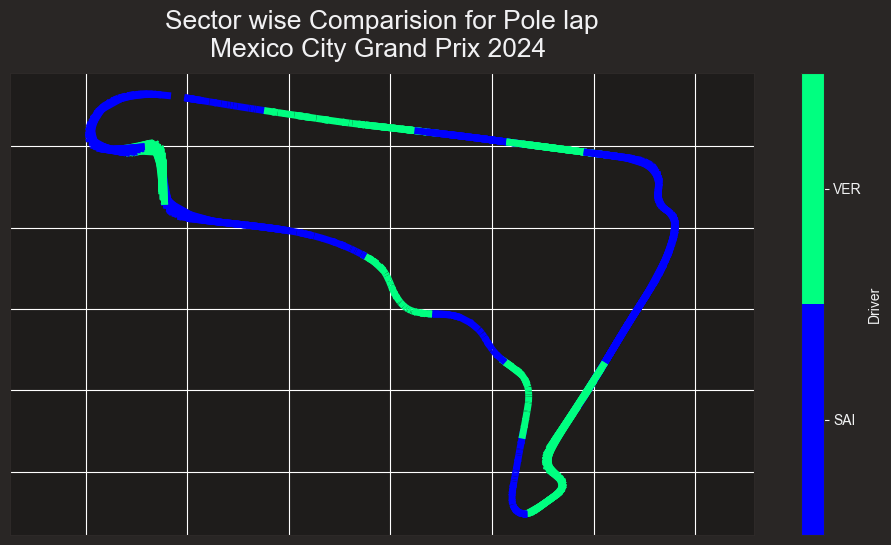

core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/21/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Deskt

Processing São Paulo Grand Prix (Round 21)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '63', '22', '31', '30', '16', '23', '81', '14', '18', '77', '1', '11', '55', '10', '44', '50', '43', '27', '24']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



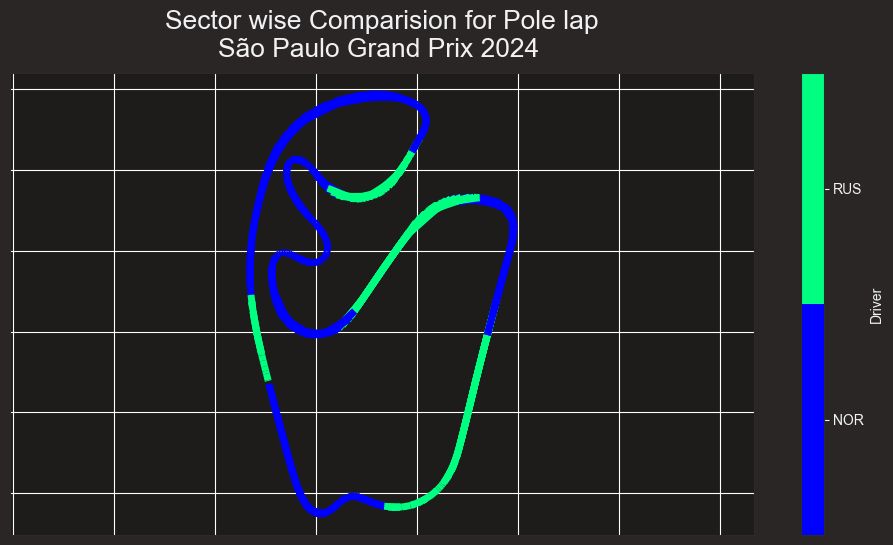

core           INFO 	Loading data for Las Vegas Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/22/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Deskt

Processing Las Vegas Grand Prix (Round 22)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '55', '10', '16', '1', '4', '22', '81', '27', '44', '31', '20', '24', '43', '30', '11', '14', '23', '77', '18']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



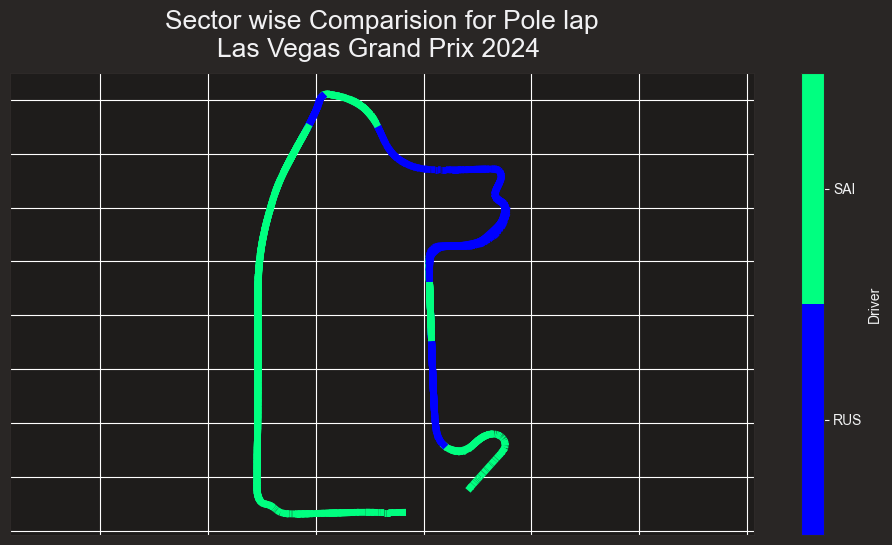

core           INFO 	Loading data for Qatar Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/23/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Desktop\F

Processing Qatar Grand Prix (Round 23)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '4', '81', '16', '44', '55', '14', '11', '20', '10', '24', '77', '22', '18', '23', '30', '27', '43', '31']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



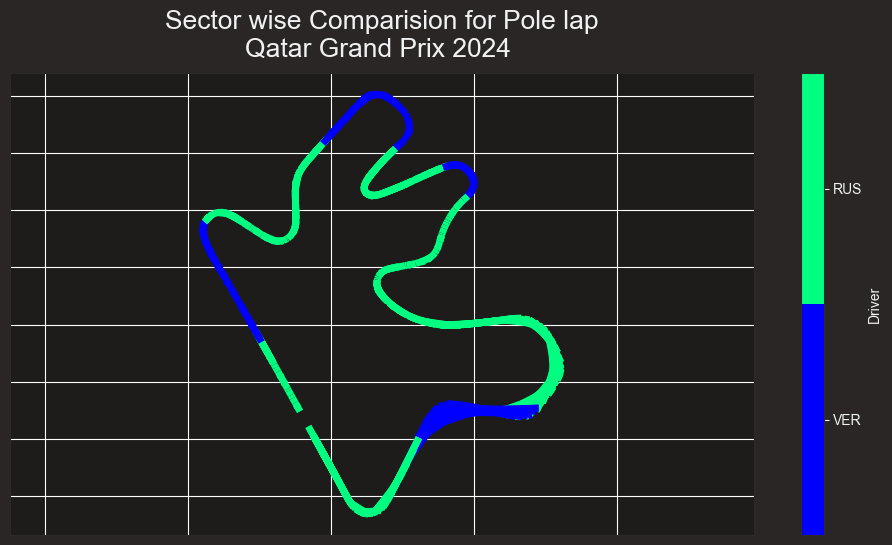

core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/24/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
  File "c:\Users\Admin\Deskt

Processing Abu Dhabi Grand Prix (Round 24)


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '55', '27', '1', '10', '63', '14', '77', '11', '22', '30', '18', '16', '20', '23', '24', '44', '43', '61']
c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.

c:\Users\Admin\Desktop\F1 2024 Season Analysis\myenv\Lib\site-packages\fastf1\core.py:3022: FutureWarning:

pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.



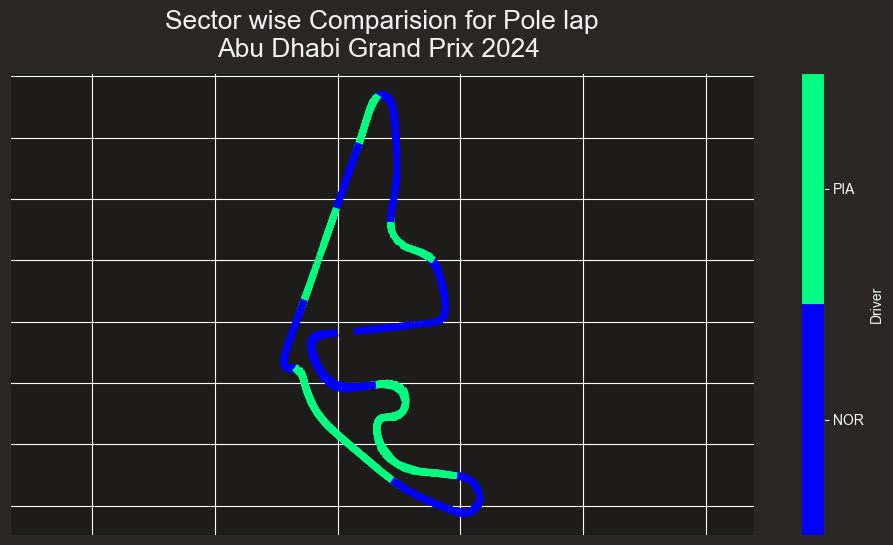

In [67]:

from matplotlib.collections import LineCollection


for round_number in schedule['RoundNumber']:
    try:
        event_name = schedule.loc[schedule['RoundNumber'] == round_number, 'EventName'].values[0]
        print(f"Processing {event_name} (Round {round_number})")

        
        session_q = fastf1.get_session(2024, round_number, 'Q')
        session_q.load()

        
        if session_q.results is None or session_q.laps is None:
            print(f"Skipping {event_name} (Round {round_number}) due to missing data.")
            continue

        results = session_q.results

        
        top_2_drivers = results.nsmallest(2, 'Position')['Abbreviation'].tolist()
        if len(top_2_drivers) < 2:
            print(f"Not enough drivers in {event_name} (Round {round_number}). Skipping...")
            continue

        driver1, driver2 = top_2_drivers

        
        driver1_team = results.loc[results['Abbreviation'] == driver1, 'TeamName'].values[0]
        driver2_team = results.loc[results['Abbreviation'] == driver2, 'TeamName'].values[0]

        
        driver1_color = team_colors.get(driver1_team, 'black')
        driver2_color = 'black' if driver1_team == driver2_team else team_colors.get(driver2_team, 'black')

        
        driver1_lap = session_q.laps.pick_driver(driver1).pick_fastest()
        driver2_lap = session_q.laps.pick_driver(driver2).pick_fastest()

        if driver1_lap is None or driver2_lap is None:
            print(f"Skipping {event_name} (Round {round_number}) due to missing lap data.")
            continue

        
        driver1_tel = driver1_lap.get_car_data().add_distance()
        driver2_tel = driver2_lap.get_car_data().add_distance()

        driver1_pos = driver1_lap.get_pos_data()
        driver2_pos = driver2_lap.get_pos_data()

        
        driver1_tel = pd.merge(driver1_tel, driver1_pos, left_index=True, right_index=True, how="inner")
        driver2_tel = pd.merge(driver2_tel, driver2_pos, left_index=True, right_index=True, how="inner")

        driver1_tel['Driver'] = driver1
        driver2_tel['Driver'] = driver2

        all_tel = pd.concat([driver1_tel, driver2_tel])

        # Divide track into minisectors
        num_minisectors = 21  # Adjustable
        total_distance = max(all_tel['Distance'])
        minisector_length = total_distance / num_minisectors

        all_tel['Minisector'] = all_tel['Distance'].apply(lambda dist: int((dist // minisector_length) + 1))

        # Find fastest driver in each minisector
        average_speed = all_tel.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
        fastest_driver = average_speed.loc[average_speed.groupby('Minisector')['Speed'].idxmax()]
        fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_Driver'})

        
        all_tel = all_tel.merge(fastest_driver, on=['Minisector']).sort_values(by=['Distance'])

        # Convert driver names to numeric values
        all_tel['Fastest_Driver_int'] = all_tel['Fastest_Driver'].map({driver1: 1, driver2: 2})

        x = all_tel['X'].values
        y = all_tel['Y'].values

        
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        fastest_driver_array = all_tel['Fastest_Driver_int'].to_numpy().astype(float)

        
        cmap = plt.get_cmap('winter', 2)
        lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N + 1), cmap=cmap)
        lc_comp.set_array(fastest_driver_array)
        lc_comp.set_linewidth(5)

        plt.figure(figsize=(12, 6))
        plt.gca().add_collection(lc_comp)
        plt.axis('equal')
        plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

        cbar = plt.colorbar(mappable=lc_comp, label='Driver', boundaries=np.arange(1, 4))
        cbar.set_ticks([1.5, 2.5])
        cbar.set_ticklabels([driver1, driver2])

        plt.title(f"Sector wise Comparision for Pole lap\n{event_name} {session_q.event.year} ")
        plt.show()

    except Exception as e:
        print(f"Error processing {event_name} (Round {round_number}): {e}")
